## Time Series Analysis for Sparkling Wine

### 1.Read the data as an appropriate Time Series data and plot the data.

In [988]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [989]:
df_sparkling = pd.read_csv("Sparkling.csv")

In [990]:
df_sparkling.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [991]:
df_sparkling.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [992]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [993]:
df_sparkling['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_sparkling.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [994]:
df_sparkling = df_sparkling.set_index('Time_Stamp')
df_sparkling.drop(['YearMonth'], axis=1, inplace=True)
df_sparkling.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [995]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

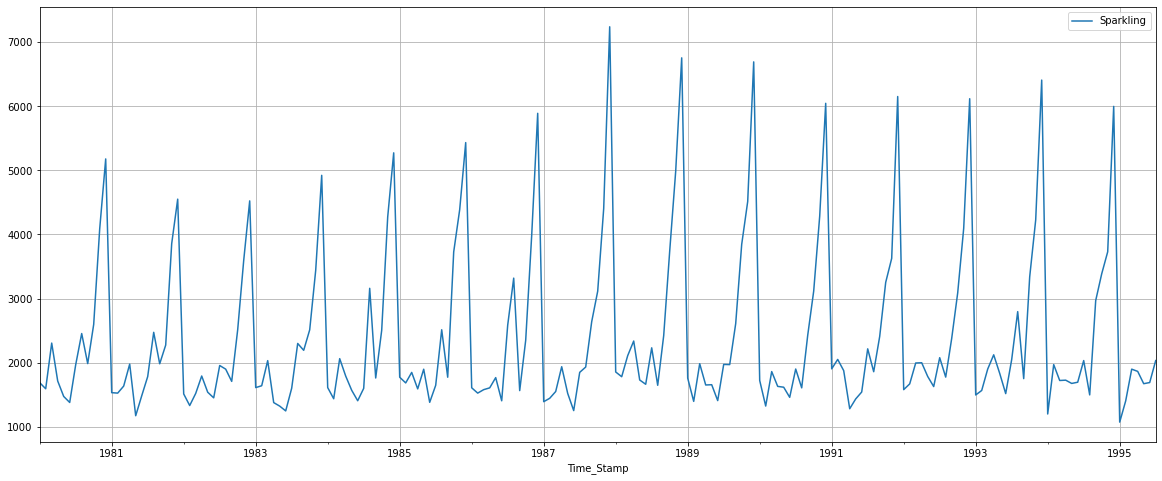

In [996]:
df_sparkling.plot()
plt.grid();

### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Find the mean and median of the monthly wine sales.

In [997]:
df_sparkling.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

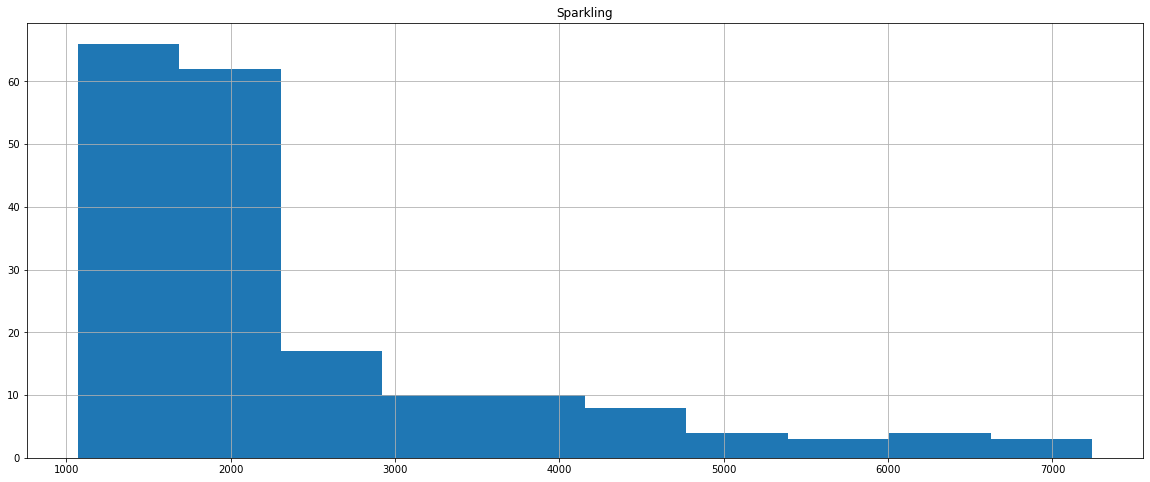

In [998]:
df_sparkling.hist()
plt.show()

#### Plot a year on year boxplot for the wine sales.

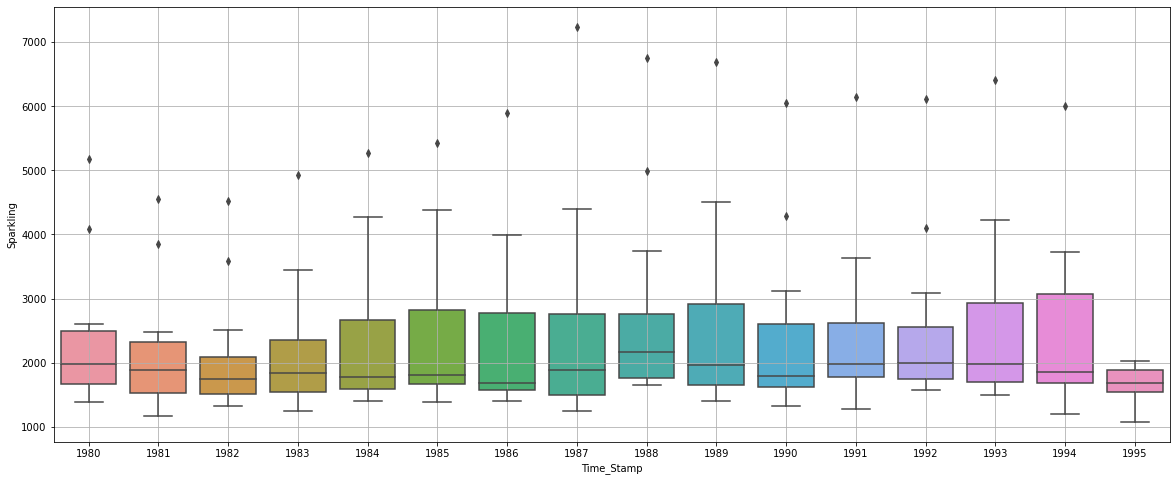

In [999]:
sns.boxplot(x = df_sparkling.index.year,y = df_sparkling['Sparkling'])
plt.grid();

#### Monthly Plot

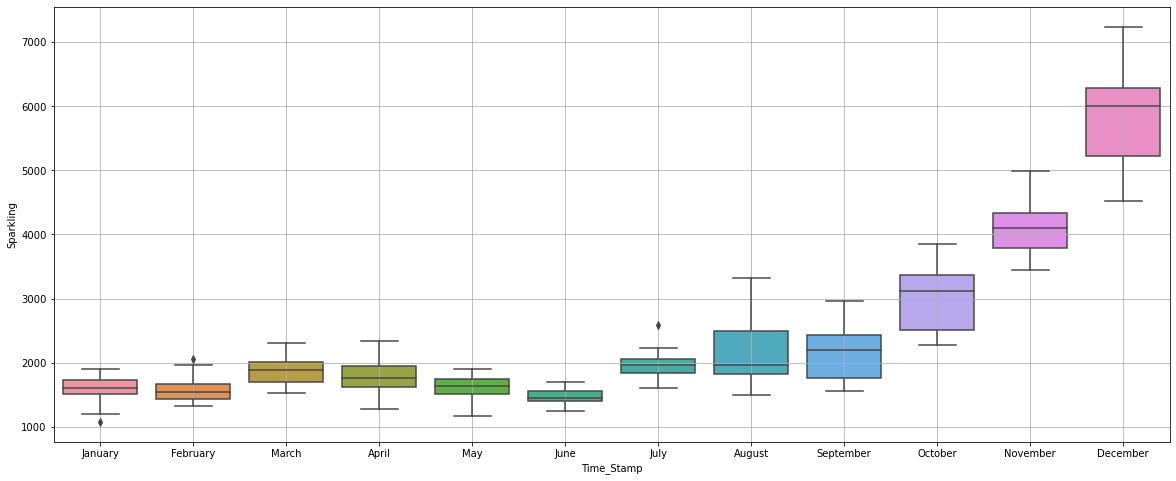

In [1000]:
sns.boxplot(x = df_sparkling.index.month_name(),y = df_sparkling['Sparkling'])
plt.grid();

#### Plot a graph of monthly sales across years.

In [1001]:
monthly_sales_across_years = pd.pivot_table(df_sparkling, values = 'Sparkling', columns = df_sparkling.index.year, index = df_sparkling.index.month)
monthly_sales_across_years

Time_Stamp    1980    1981    1982    1983    1984    1985    1986    1987  \
Time_Stamp                                                                   
1           1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0   
2           1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0   
3           2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0   
4           1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0   
5           1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0   
6           1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0   
7           1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0   
8           2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0   
9           1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0   
10          2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0   
11          4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0   
12          5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0   

Time_Stamp    1988    1989    1990    1991    1992    1993    1994    1995  
Time_Stamp                                                                  
1           1853.0  1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
2           1779.0  1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
3           2108.0  1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
4           2336.0  1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
5           1728.0  1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
6           1661.0  1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
7           2230.0  1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
8           1645.0  1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
9           2421.0  2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
10          3740.0  3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
11          4988.0  4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
12          6757.0  6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

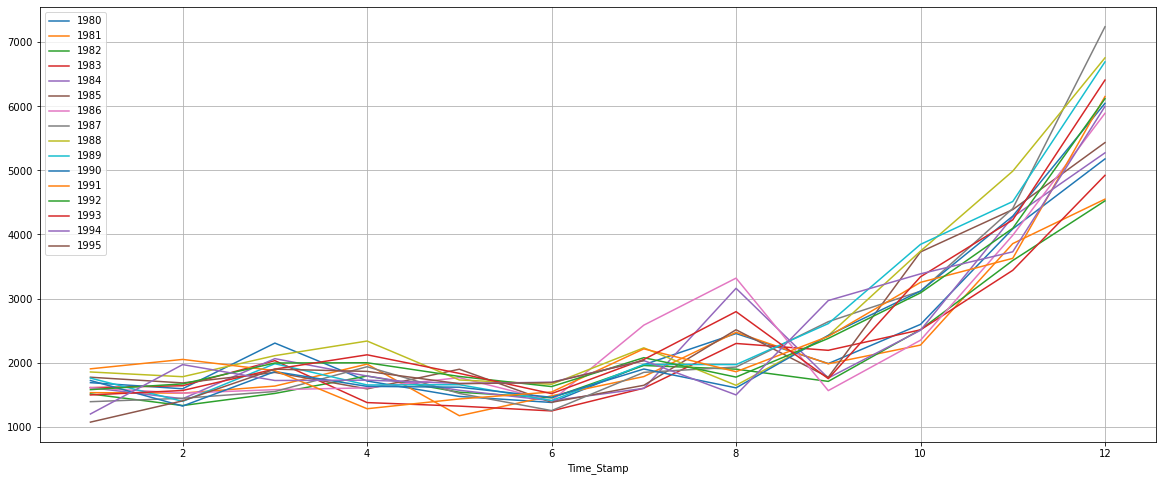

In [1002]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution.

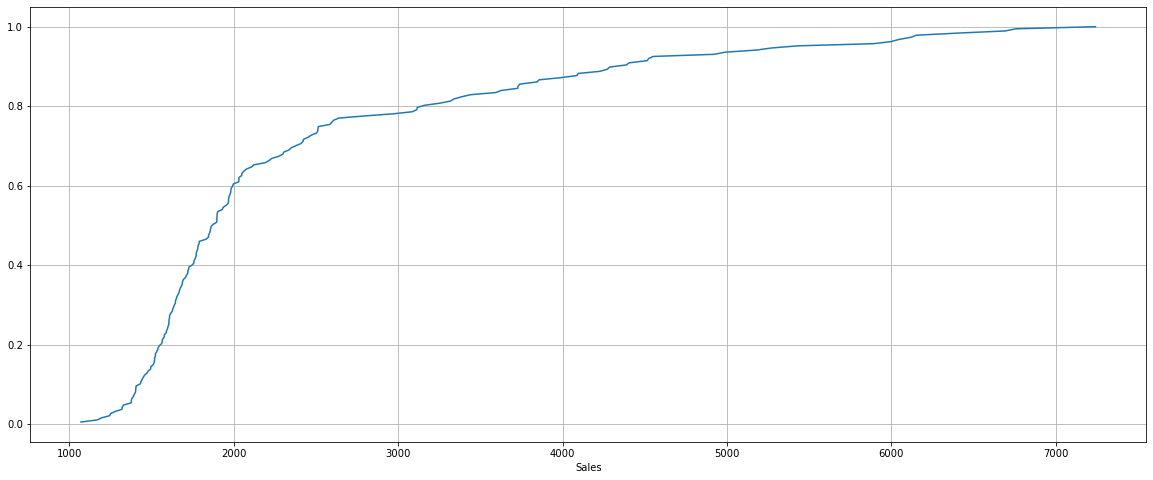

In [1003]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

cdf = ECDF(df_sparkling['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average sales per month and the month on month percentage change of sales.

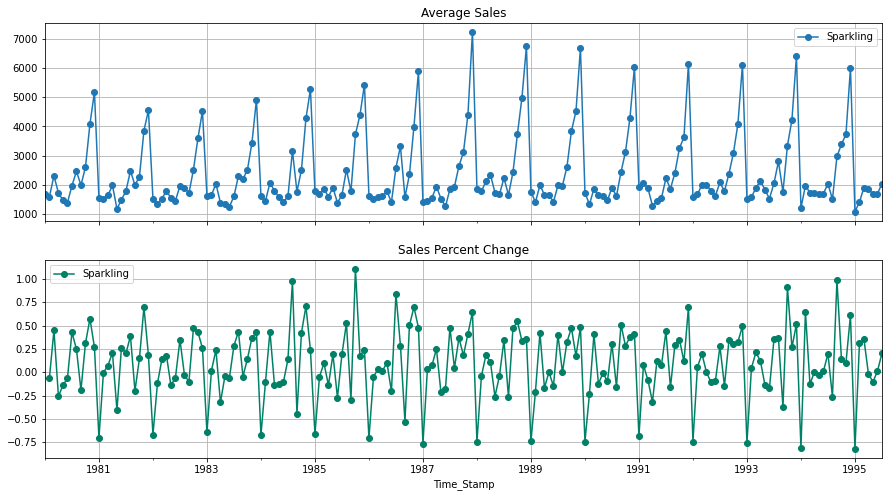

In [1004]:
# group by date and get average RetailSales, and precent change
average    = df_sparkling.groupby(df_sparkling.index)["Sparkling"].mean()
pct_change = df_sparkling.groupby(df_sparkling.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

#### Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

#### Yearly Plot

In [1005]:
df_yearly_sum = df_sparkling.resample('A').sum()
df_yearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

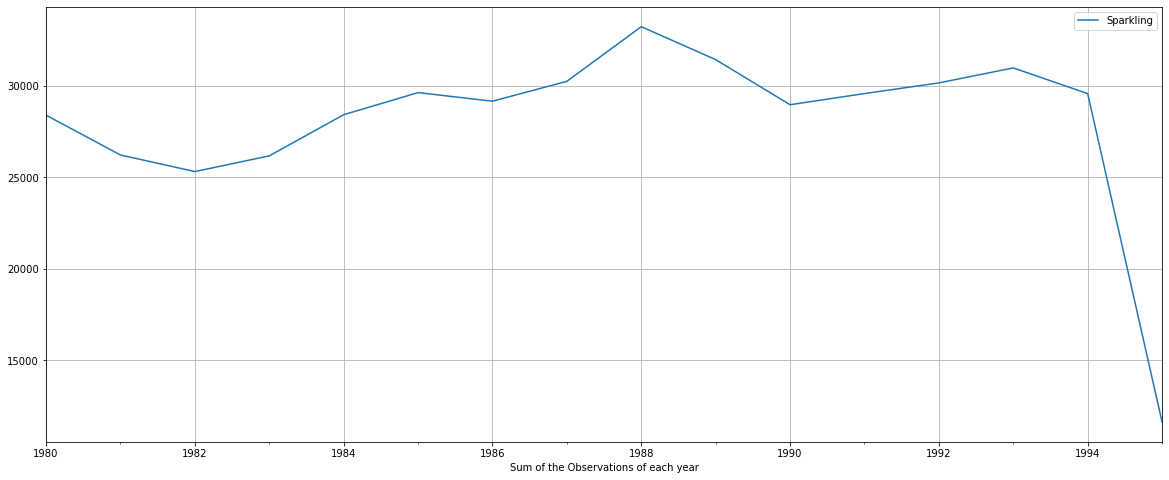

In [1006]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

#### Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [1007]:
df_yearly_mean = df_sparkling.resample('Y').mean()
df_yearly_mean.head()

Sparkling
Time_Stamp             
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

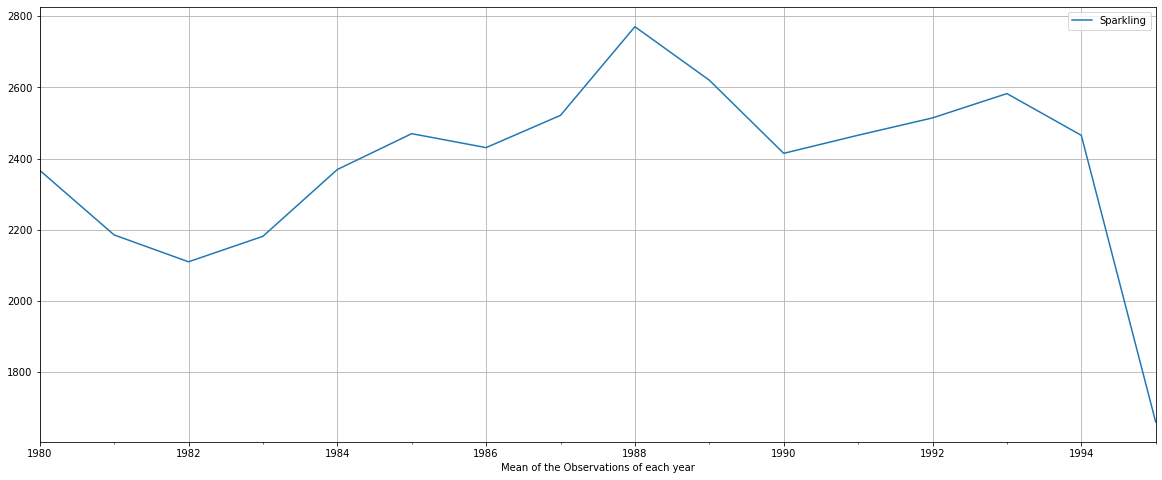

In [1008]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

#### Quarterly Plot

In [1009]:
df_quarterly_sum = df_sparkling.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
Time_Stamp           
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

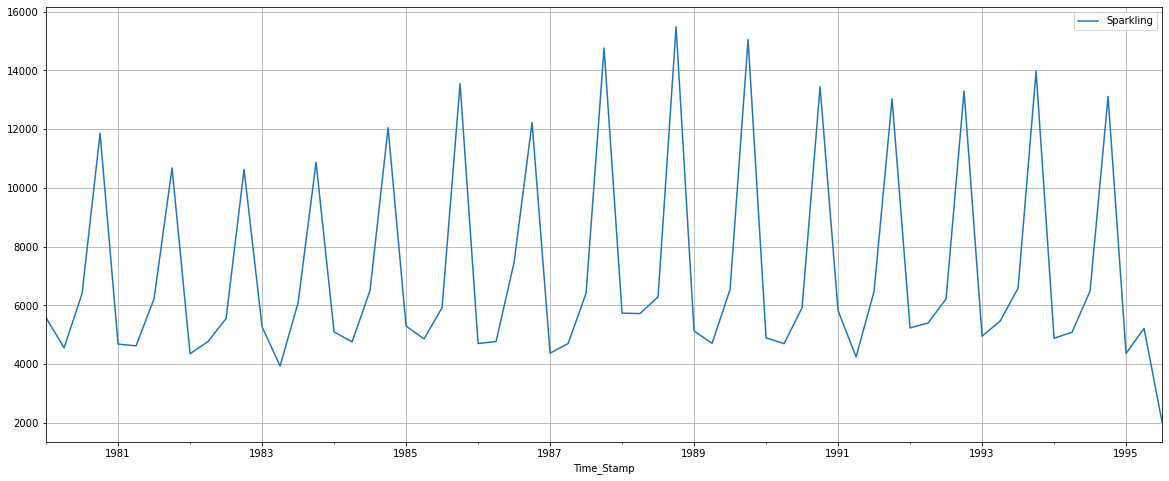

In [1010]:
df_quarterly_sum.plot();
plt.grid()

In [1011]:
df_quarterly_mean = df_sparkling.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

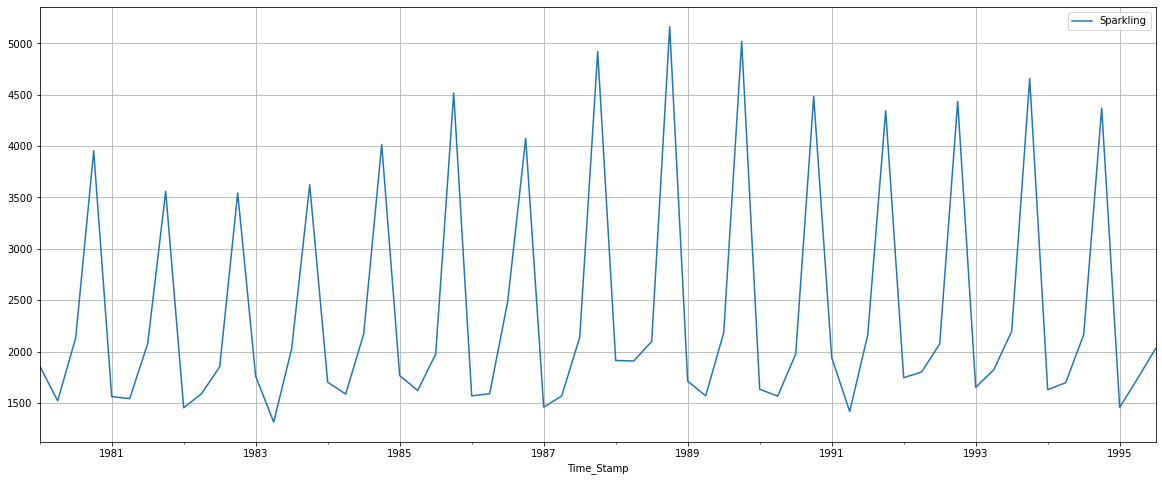

In [1012]:
df_quarterly_mean.plot();
plt.grid()

#### Daily Plot

In [1013]:
df_daily_sum = df_sparkling.resample('D').sum()
df_daily_sum

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0
...               ...
1995-07-27          0
1995-07-28          0
1995-07-29          0
1995-07-30          0
1995-07-31       2031

[5661 rows x 1 columns]

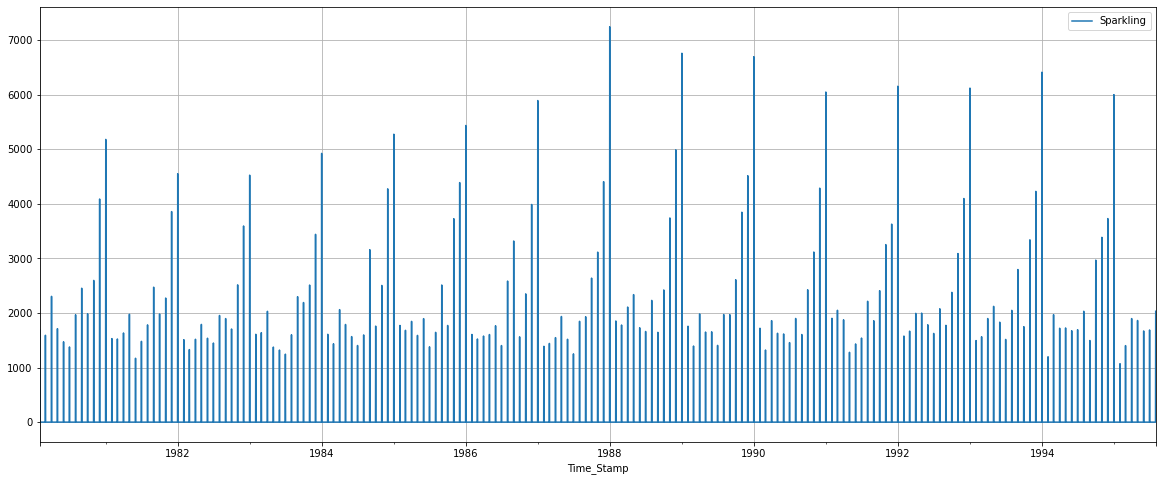

In [1014]:
df_daily_sum.plot()
plt.grid();

#### Decade Plot

In [1015]:
df_decade_sum = df_sparkling.resample('10Y').sum()
df_decade_sum

Sparkling
Time_Stamp           
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

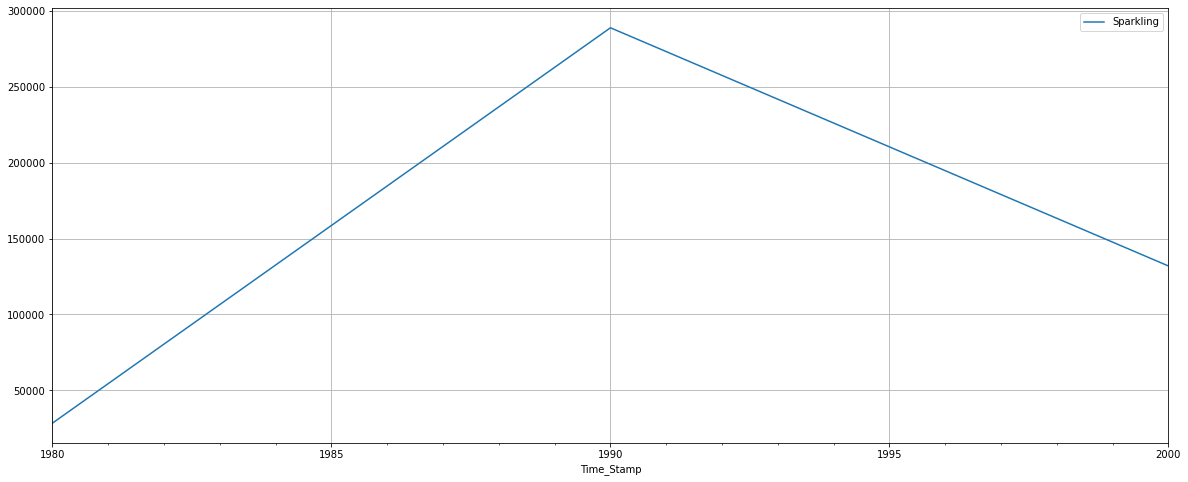

In [1016]:
df_decade_sum.plot();
plt.grid()

#### Decompose the Time Series and plot the different components.

In [1017]:
from statsmodels.tsa.seasonal import seasonal_decompose

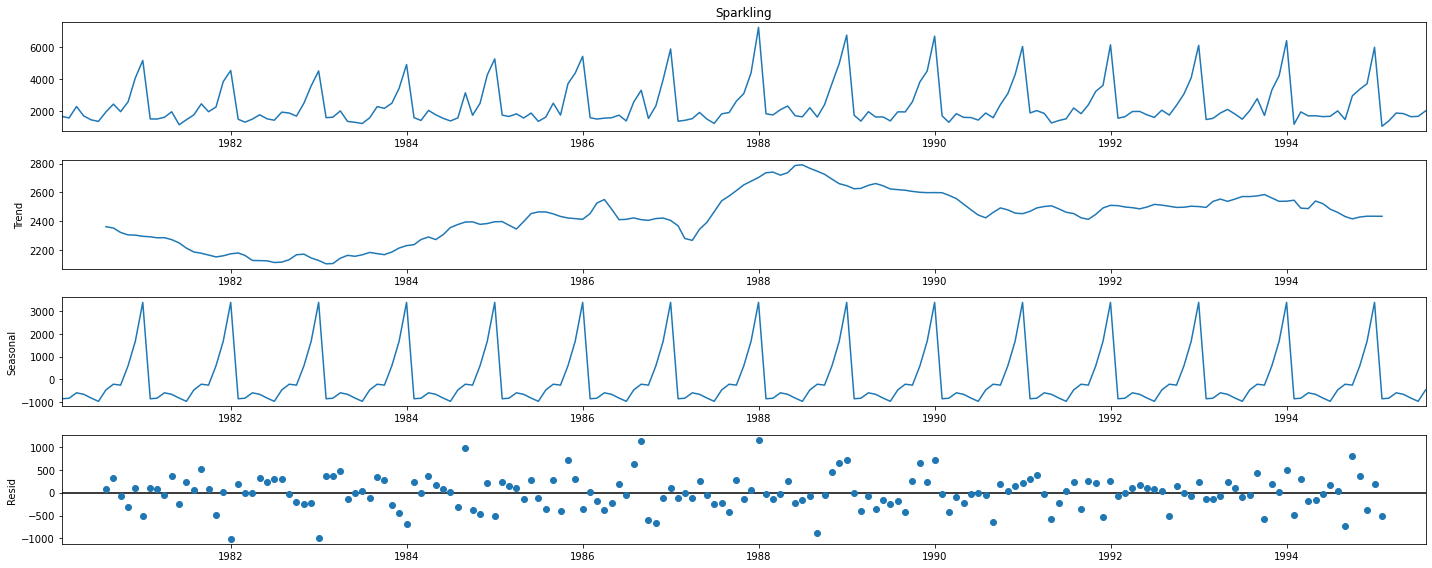

In [1018]:
decomposition = seasonal_decompose(df_sparkling.Sparkling,model='additive')
decomposition.plot();

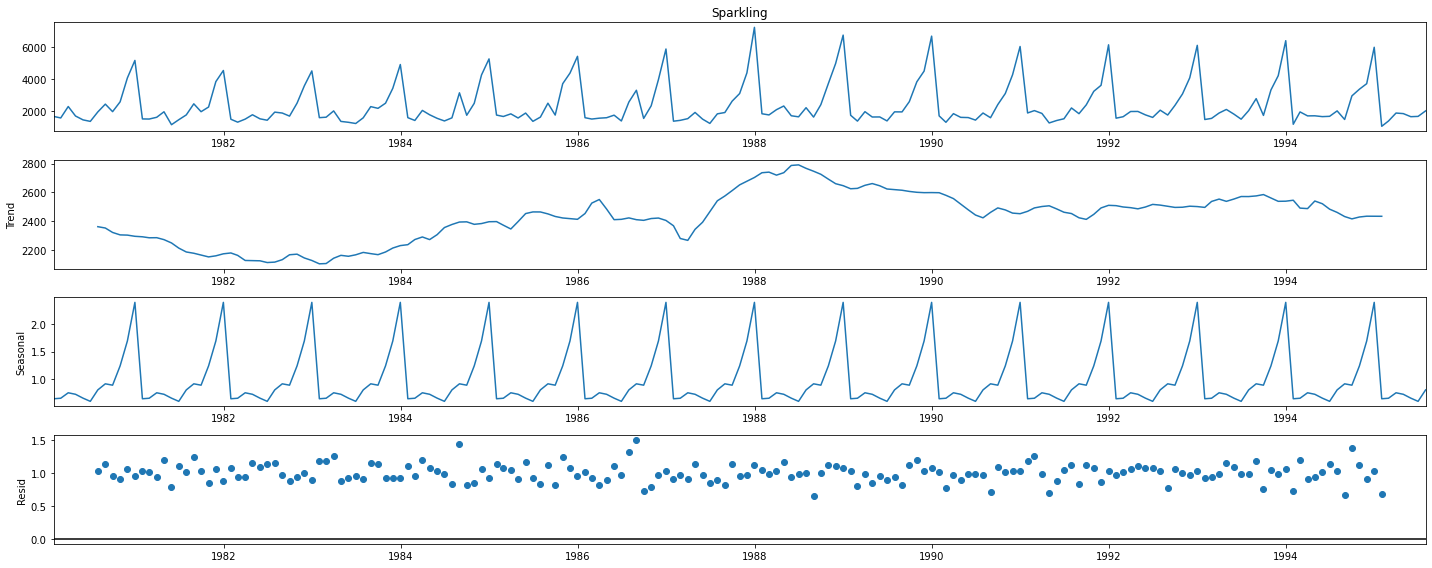

In [1019]:
decomposition = seasonal_decompose(df_sparkling.Sparkling,model='multiplicative')
decomposition.plot();

In [1020]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [1021]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [1022]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2361.695896
1980-08-31    2352.468741
1980-09-30    2321.497620
1980-10-31    2304.490847
1980-11-30    2303.092089
1980-12-31    2294.738436
dtype: float64

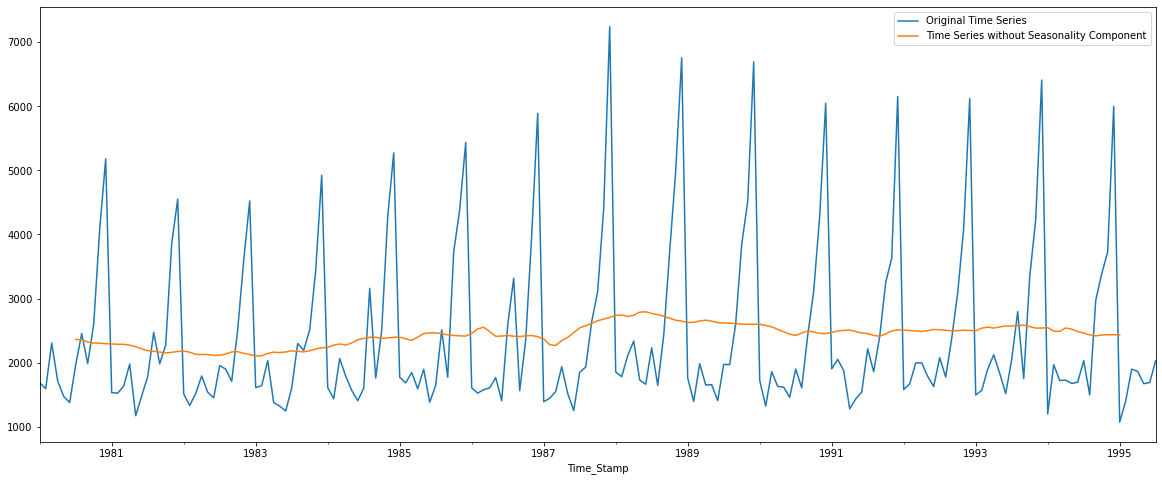

In [1023]:
df_sparkling.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

#### Missing Value Handling

In [1024]:
df_sparkling.isna().sum()

Sparkling    0
dtype: int64

#### 3.Split the data into training and test. The test data should start in 1991.

In [1025]:
train=df_sparkling[df_sparkling.index.year < 1991]
test=df_sparkling[df_sparkling.index.year >= 1991]

In [1026]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [1027]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [1028]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


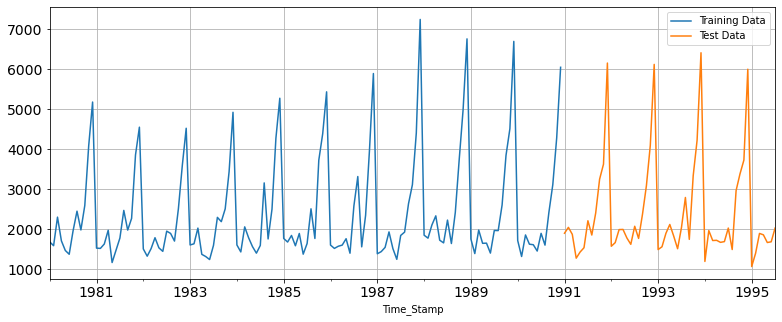

In [1029]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

#### 4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
####  Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data               and check the performance on the test data using RMSE.

#### Building different models and comparing the accuracy metrics.

#### Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [1030]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [1031]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [1032]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [1033]:
from sklearn.linear_model import LinearRegression

In [1034]:
lr = LinearRegression()

In [1035]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

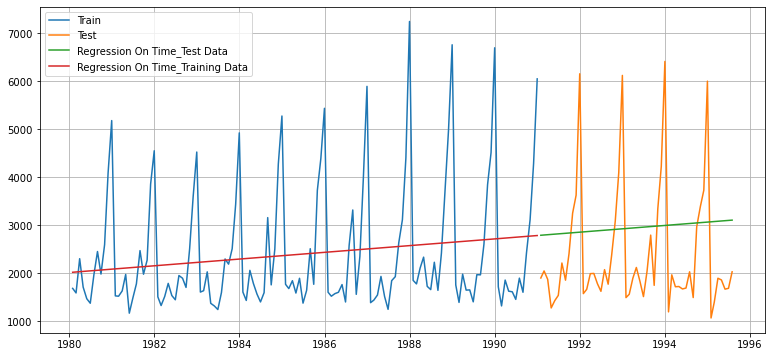

In [1036]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [1037]:
from sklearn import metrics

In [1038]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

### Model Evaluation

In [1039]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 MAPE is 40.05


In [1040]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 MAPE is 50.15


In [1041]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

#### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [1042]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [1043]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [1044]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

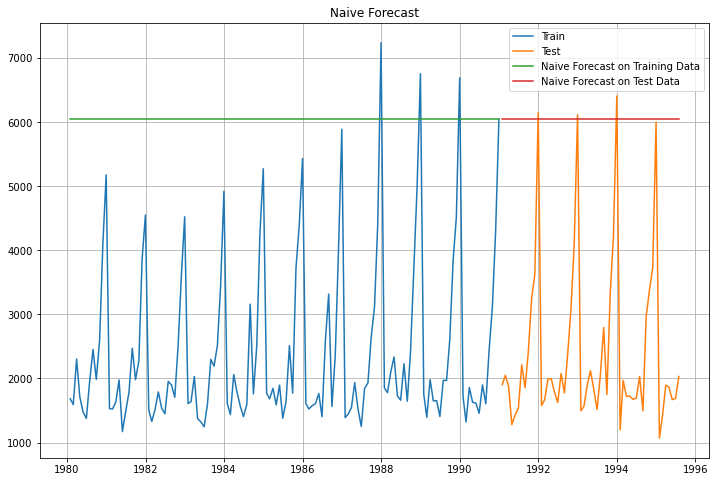

In [1045]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [1046]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 MAPE is 153.17


In [1047]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [1048]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

#### Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [1049]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [1050]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
Time_Stamp                          
1980-01-31       1686    2403.780303
1980-02-29       1591    2403.780303
1980-03-31       2304    2403.780303
1980-04-30       1712    2403.780303
1980-05-31       1471    2403.780303

In [1051]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

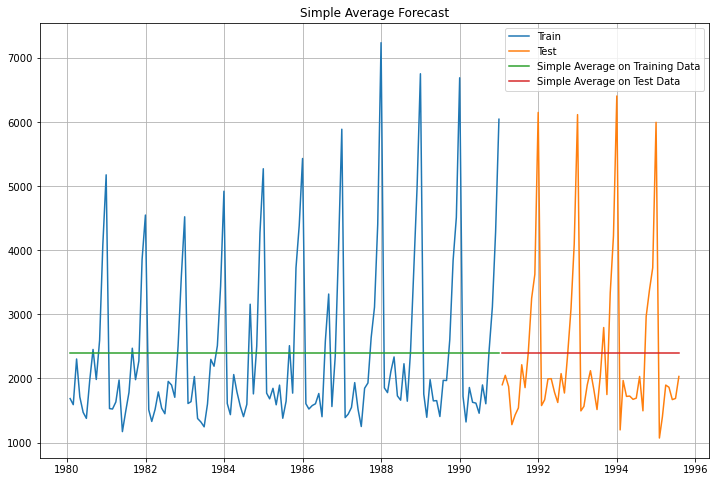

In [1052]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [1053]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [1054]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [1055]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

#### Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [1056]:
MovingAverage = df_sparkling.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

#### Trailing moving averages

In [1057]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

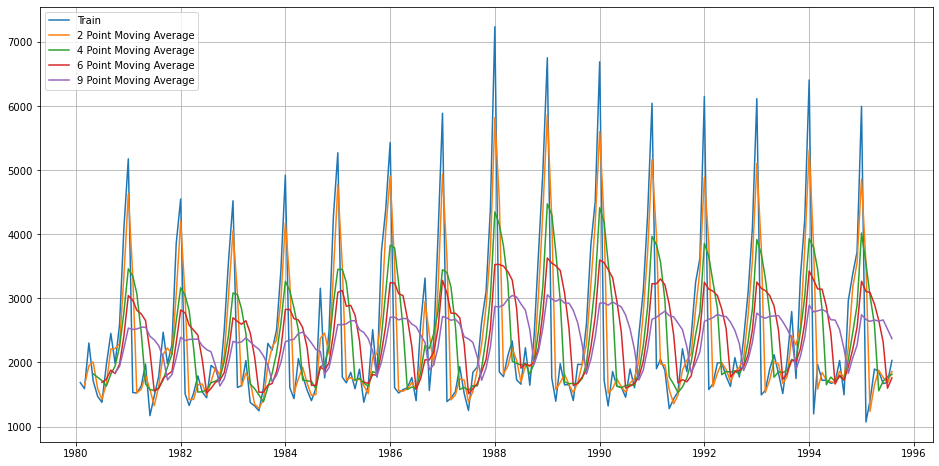

In [1058]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [1059]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

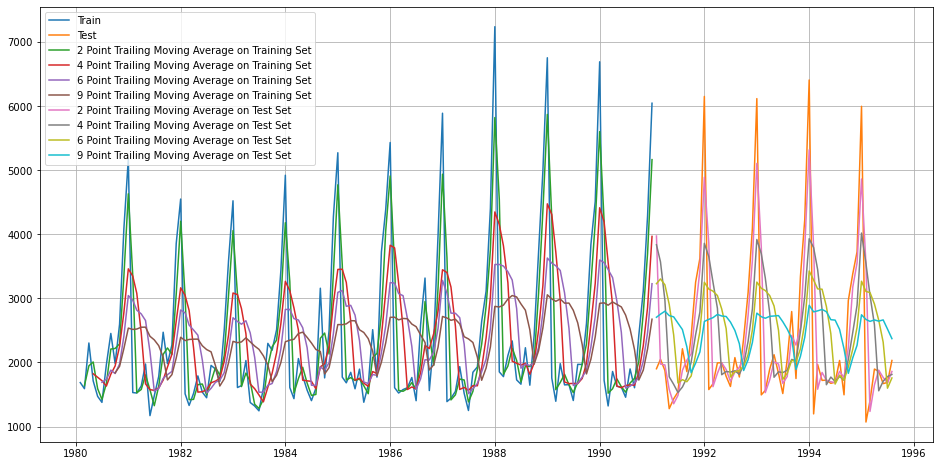

In [1060]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

##### Done only on the test data.

In [1061]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 MAPE is 46.86


In [1062]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1389.135175      50.15
NaiveModel                   3864.279352     152.87
SimpleAverageModel           1275.081804      38.90
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1283.927428      43.86
9pointTrailingMovingAverage  1346.278315      46.86

#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

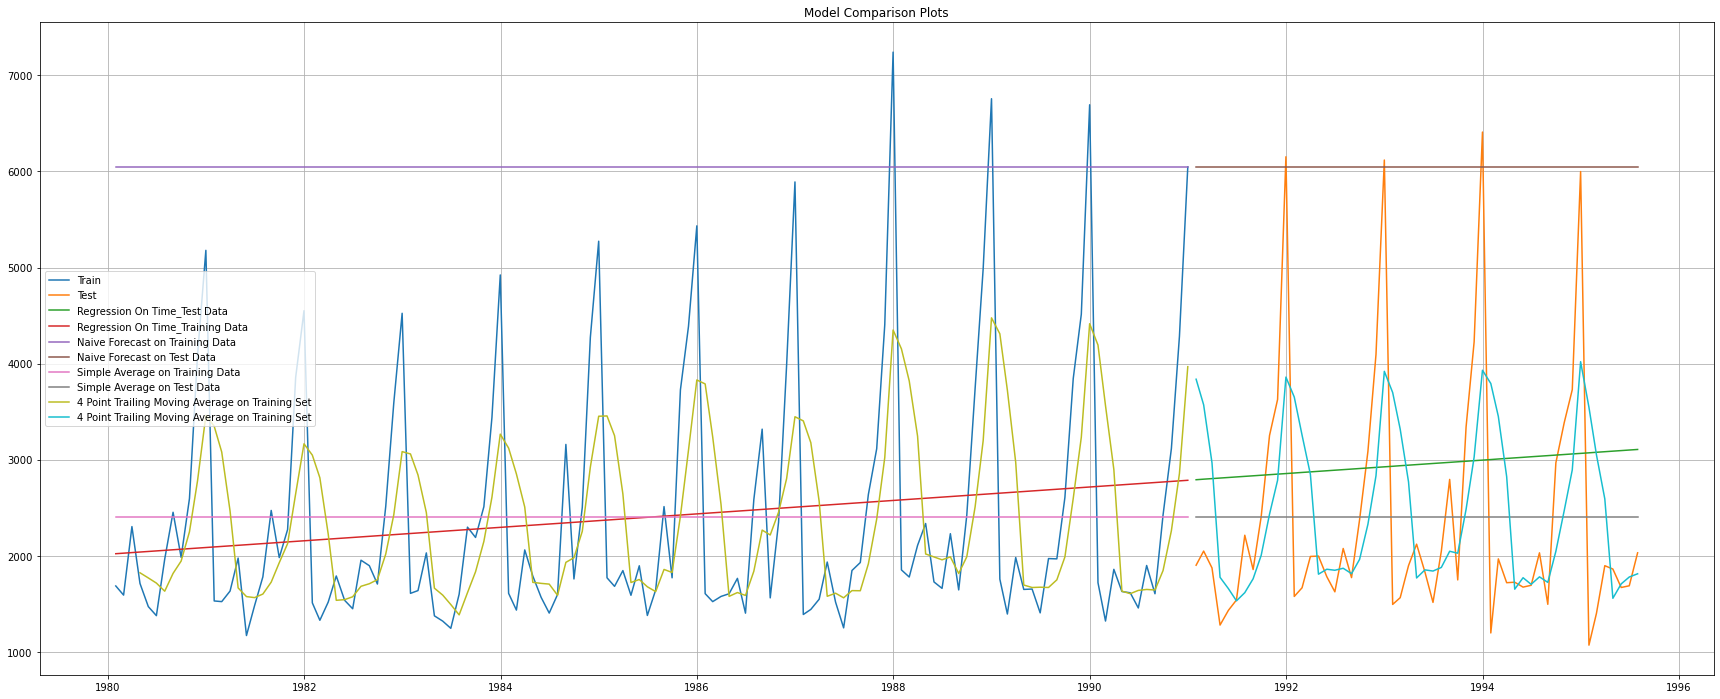

In [1063]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### Method 5: Simple Exponential Smoothing

In [1064]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [1065]:
SES_train = train.copy()
SES_test = test.copy()

In [1066]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [1067]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [1068]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.762550263244,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1069]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling     predict
Time_Stamp                       
1980-01-31       1686  2403.76255
1980-02-29       1591  2403.76255
1980-03-31       2304  2403.76255
1980-04-30       1712  2403.76255
1980-05-31       1471  2403.76255

In [1070]:
len(SES_test)

55

In [1071]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Sparkling     predict
Time_Stamp                       
1991-01-31       1902  2403.76255
1991-02-28       2049  2403.76255
1991-03-31       1874  2403.76255
1991-04-30       1279  2403.76255
1991-05-31       1432  2403.76255

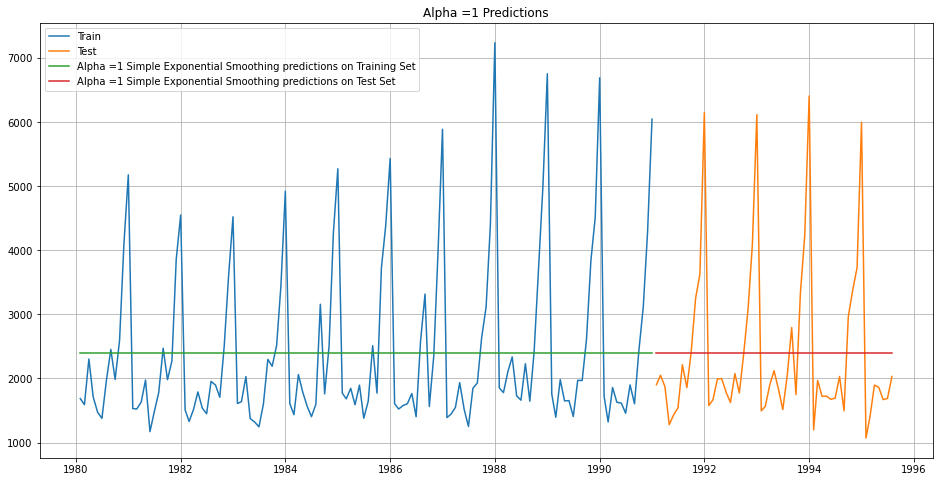

In [1072]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

#### Model Evaluation for $\alpha$ = 1 : Simple Exponential Smoothing

In [1073]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Sparkling'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [1074]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1275.082 MAPE is 38.90


In [1075]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                    1389.135175      50.15
NaiveModel                          3864.279352     152.87
SimpleAverageModel                  1275.081804      38.90
2pointTrailingMovingAverage          813.400684      19.70
4pointTrailingMovingAverage         1156.589694      35.96
6pointTrailingMovingAverage         1283.927428      43.86
9pointTrailingMovingAverage         1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing  1275.081739      38.90

#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [1076]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [1077]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

#### Model Evaluation

In [1078]:
resultsDf_6

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.3  1359.511747       43.73  1935.507132      75.66
1           0.4  1352.588879       42.75  2311.919615      91.55
2           0.5  1344.004369       41.16  2666.351413     106.27
3           0.6  1338.805381       39.80  2979.204388     118.77
4           0.7  1338.844308       38.55  3249.944092     129.34
5           0.8  1344.462091       37.60  3483.801006     138.34
6           0.9  1355.723518       36.79  3686.794285     146.08

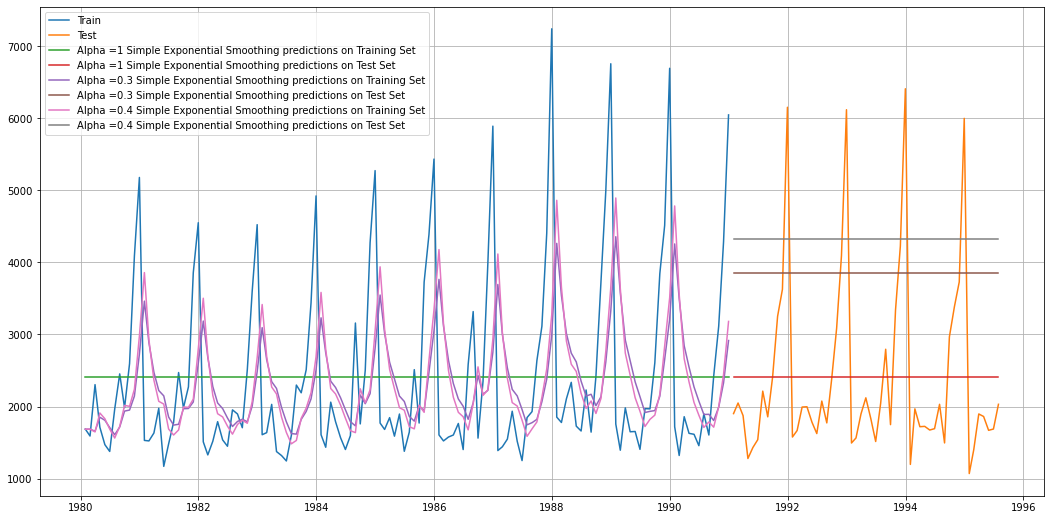

In [1079]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [1080]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1389.135175      50.15
NaiveModel                            3864.279352     152.87
SimpleAverageModel                    1275.081804      38.90
2pointTrailingMovingAverage            813.400684      19.70
4pointTrailingMovingAverage           1156.589694      35.96
6pointTrailingMovingAverage           1283.927428      43.86
9pointTrailingMovingAverage           1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing    1275.081739      38.90
Alpha=0.3,SimpleExponentialSmoothing  1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing  2311.919615      91.55

#### Method 6: Double Exponential Smoothing (Holt's Model)

#### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [1081]:
DES_train = train.copy()
DES_test = test.copy()

In [1082]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [1083]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [1084]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [1085]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1592.292788       53.75  18259.110704   
1            0.3          0.4  1682.573828       57.13  26069.841401   
2            0.3          0.5  1771.710791       59.92  34401.512440   
3            0.3          0.6  1848.576510       62.06  42162.748095   
4            0.3          0.7  1899.949006       62.87  47832.397419   
..           ...          ...          ...         ...           ...   
59           1.0          0.6  1753.402326       45.75  49327.087977   
60           1.0          0.7  1825.187155       47.97  52655.765663   
61           1.0          0.8  1902.013709       50.11  55442.273880   
62           1.0          0.9  1985.368445       52.03  57823.177011   
63           1.0          1.0  2077.672157       53.81  59877.076519   

    Test MAPE  
0      675.28  
1      960.18  
2     1264.55  
3     1548.94  
4     1757.91  
..        ...  
59    1824.42  
60    1945.23  
61    2046.36  
62    2132.75  
63    2207.28  

[64 rows x 6 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [1086]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1592.292788       53.75  18259.110704   
8            0.4          0.3  1569.338606       50.06  23878.496940   
1            0.3          0.4  1682.573828       57.13  26069.841401   
16           0.5          0.3  1530.575845       45.92  27095.532414   
24           0.6          0.3  1506.449870       42.79  29070.722592   

    Test MAPE  
0      675.28  
8      886.00  
1      960.18  
16    1007.39  
24    1082.18

In [1087]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.3          0.3  1592.292788       53.75  18259.110704   
8            0.4          0.3  1569.338606       50.06  23878.496940   
1            0.3          0.4  1682.573828       57.13  26069.841401   
16           0.5          0.3  1530.575845       45.92  27095.532414   
24           0.6          0.3  1506.449870       42.79  29070.722592   

    Test MAPE  
0      675.28  
8      886.00  
1      960.18  
16    1007.39  
24    1082.18

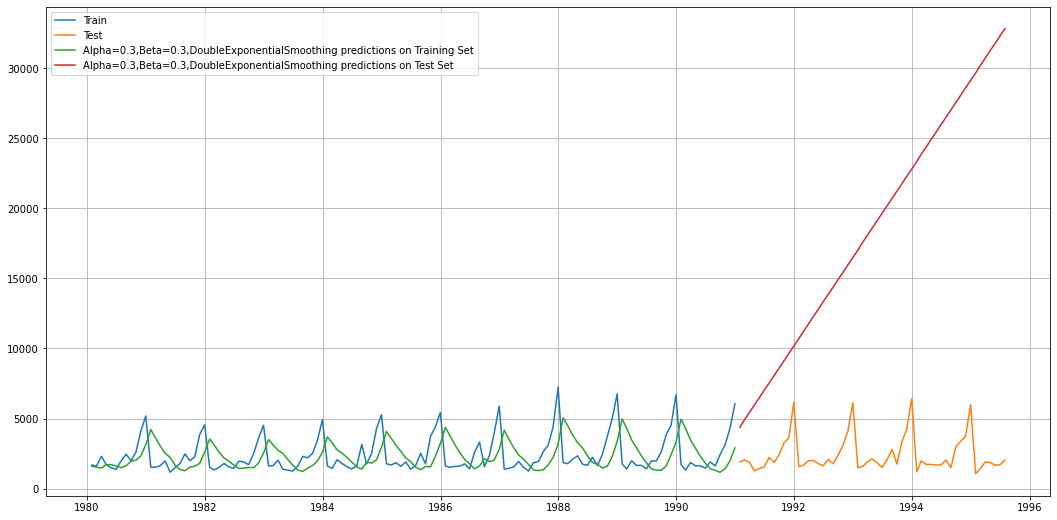

In [1088]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [1089]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                1389.135175      50.15
NaiveModel                                      3864.279352     152.87
SimpleAverageModel                              1275.081804      38.90
2pointTrailingMovingAverage                      813.400684      19.70
4pointTrailingMovingAverage                     1156.589694      35.96
6pointTrailingMovingAverage                     1283.927428      43.86
9pointTrailingMovingAverage                     1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing              1275.081739      38.90
Alpha=0.3,SimpleExponentialSmoothing            1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing            2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704     675.28

#### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [1090]:
TES_train = train.copy()
TES_test = test.copy()

In [1091]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [1092]:
model_TES_autofit = model_TES.fit()

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [1093]:
model_TES_autofit.params

{'smoothing_level': 0.1541983771982372,
 'smoothing_slope': 5.189414295988849e-21,
 'smoothing_seasonal': 0.3713299858378782,
 'damping_slope': nan,
 'initial_level': 1639.9993278777176,
 'initial_slope': 4.84642057386791,
 'initial_seasons': array([1.0084339 , 0.96899852, 1.24181877, 1.13206906, 0.93979327,
        0.93811531, 1.22458354, 1.54428601, 1.27335854, 1.63198403,
        2.48293255, 3.11863164]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1094]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling  auto_predict
Time_Stamp                         
1980-01-31       1686   1658.718206
1980-02-29       1591   1602.591571
1980-03-31       2304   2057.526841
1980-04-30       1712   1915.819675
1980-05-31       1471   1568.892063

In [1095]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1602.193101
1991-02-28       2049   1373.883758
1991-03-31       1874   1807.433384
1991-04-30       1279   1704.564989
1991-05-31       1432   1602.365955

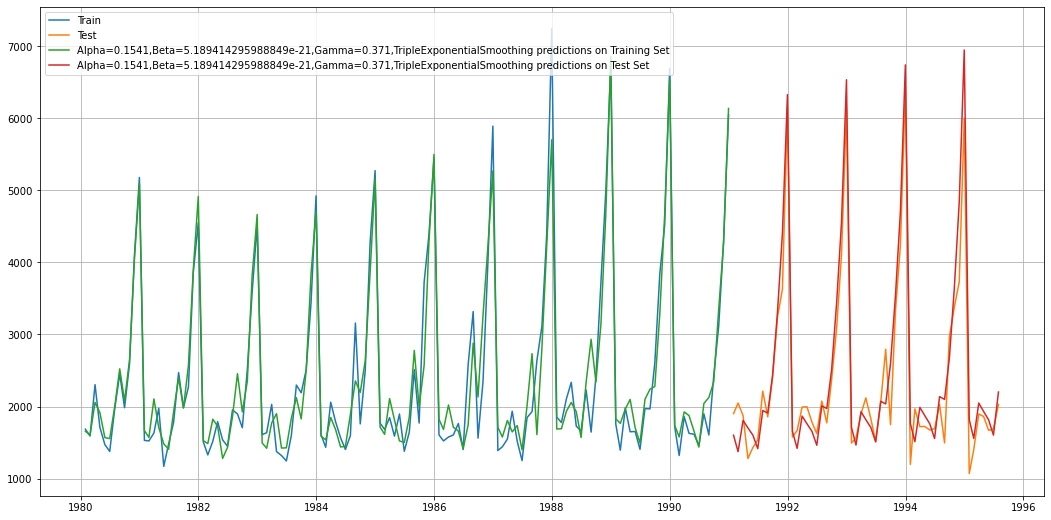

In [1096]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.1541,Beta=5.189414295988849e-21,Gamma=0.371,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.1541,Beta=5.189414295988849e-21,Gamma=0.371,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [1097]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.1541983771982372,Beta: 5.189414295988849e-21 and Gamma: 0.3713299858378782, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.1541983771982372,Beta: 5.189414295988849e-21 and Gamma: 0.3713299858378782, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 353.379 MAPE is 10.17


In [1098]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.1541983771982372,Beta: 5.189414295988849e-21 and Gamma: 0.3713299858378782, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.1541983771982372,Beta: 5.189414295988849e-21 and Gamma: 0.3713299858378782, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 383.122 MAPE is 11.90


In [1099]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.154,Beta=5.189414295988849e-21,Gamma=0.371,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing                   1275.081739      38.90
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.154,Beta=5.189414295988849e-21,Gamma=0....    383.122273      11.90

In [1100]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [1101]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [1102]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE  Train MAPE  \
0             0.3          0.3           0.3     404.513320       11.21   
1             0.3          0.3           0.4     402.088628       11.01   
2             0.3          0.3           0.5     408.282432       11.05   
3             0.3          0.3           0.6     428.631668       11.51   
4             0.3          0.3           0.7     468.958530       12.68   
..            ...          ...           ...            ...         ...   
507           1.0          1.0           0.6  153394.791826     1428.87   
508           1.0          1.0           0.7   94040.964958     1036.30   
509           1.0          1.0           0.8  102196.953755      888.48   
510           1.0          1.0           0.9   77924.294413      876.07   
511           1.0          1.0           1.0  239917.432847     1303.21   

        Test RMSE  Test MAPE  
0    3.927862e+02      13.51  
1    9.513202e+02      32.86  
2    1.470487e+03      50.27  
3    2.181724e+03      73.51  
4    3.513351e+03     115.38  
..            ...        ...  
507  7.989790e+05   17177.41  
508  1.074413e+06   28878.00  
509  5.010607e+06   65738.32  
510  4.318265e+05    6048.85  
511  1.254280e+05    3313.86  

[512 rows x 7 columns]

In [1103]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
0             0.3          0.3           0.3  404.513320       11.21   
8             0.3          0.4           0.3  424.828055       11.78   
65            0.4          0.3           0.4  435.553595       11.76   
296           0.7          0.8           0.3  700.317756       18.33   
130           0.5          0.3           0.5  498.239915       13.87   

      Test RMSE  Test MAPE  
0    392.786198      13.51  
8    410.854547      12.90  
65   421.409170      14.84  
296  518.188752      18.86  
130  542.175497      18.23

In [1104]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
8             0.3          0.4           0.3  424.828055       11.78   
0             0.3          0.3           0.3  404.513320       11.21   
65            0.4          0.3           0.4  435.553595       11.76   
134           0.5          0.3           0.9  901.166743       21.72   
130           0.5          0.3           0.5  498.239915       13.87   

      Test RMSE  Test MAPE  
8    410.854547      12.90  
0    392.786198      13.51  
65   421.409170      14.84  
134  597.528174      18.13  
130  542.175497      18.23

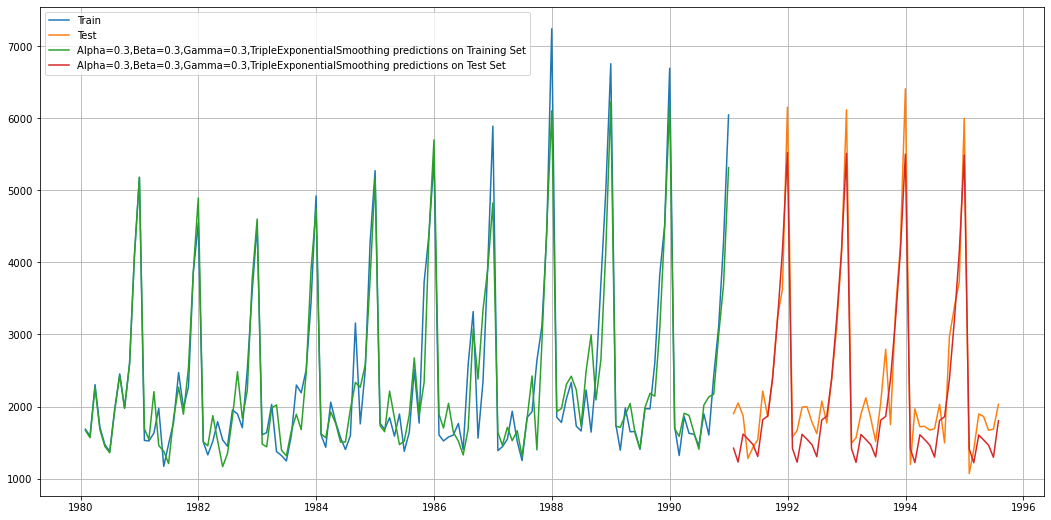

In [1105]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [1106]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][0]],'Test MAPE':[resultsDf_8_2['Test MAPE'][0]]}
                           ,index=['Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=1,SimpleExponentialSmoothing                   1275.081739      38.90
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.154,Beta=5.189414295988849e-21,Gamma=0....    383.122273      11.90
Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialS...    392.786198      13.51

In [1107]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                        Test RMSE  Test MAPE
Alpha=0.154,Beta=5.189414295988849e-21,Gamma=0....    383.122273      11.90
Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialS...    392.786198      13.51
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
Alpha=1,SimpleExponentialSmoothing                   1275.081739      38.90
SimpleAverageModel                                   1275.081804      38.90
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
RegressionOnTime                                     1389.135175      50.15
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
NaiveModel                                    

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.1541983771982372, $\beta$ = 5.189414295988849e-21 and $\gamma$ = 0.3713299858378782.

In [1108]:
fullmodel1 = ExponentialSmoothing(df_sparkling,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1541983771982372,
                                                                 smoothing_slope=5.189414295988849e-21,
                                                                 smoothing_seasonal=0.3713299858378782)

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [1109]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_sparkling['Sparkling'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df_sparkling['Sparkling'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 353.9107582549164 
MAPE: 10.22


In [1110]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

In [1111]:
prediction_1

1995-08-31    1885.067293
1995-09-30    2434.595458
1995-10-31    3198.889800
1995-11-30    3868.433442
1995-12-31    6035.913048
1996-01-31    1297.721821
1996-02-29    1640.866132
1996-03-31    1888.247834
1996-04-30    1859.327464
1996-05-31    1693.241352
1996-06-30    1625.930139
1996-07-31    2000.575375
1996-08-31    1893.642778
1996-09-30    2445.666642
1996-10-31    3213.431058
1996-11-30    3886.011598
1996-12-31    6063.329848
1997-01-31    1303.614205
1997-02-28    1648.313765
1997-03-31    1896.815054
1997-04-30    1867.760280
1997-05-31    1700.917997
1997-06-30    1633.298832
1997-07-31    2009.638532
1997-08-31    1902.218263
1997-09-30    2456.737825
1997-10-31    3227.972316
1997-11-30    3903.589755
1997-12-31    6090.746647
1998-01-31    1309.506589
1998-02-28    1655.761399
1998-03-31    1905.382273
1998-04-30    1876.193096
1998-05-31    1708.594643
1998-06-30    1640.667524
1998-07-31    2018.701688
1998-08-31    1910.793749
1998-09-30    2467.809008
1998-10-31  

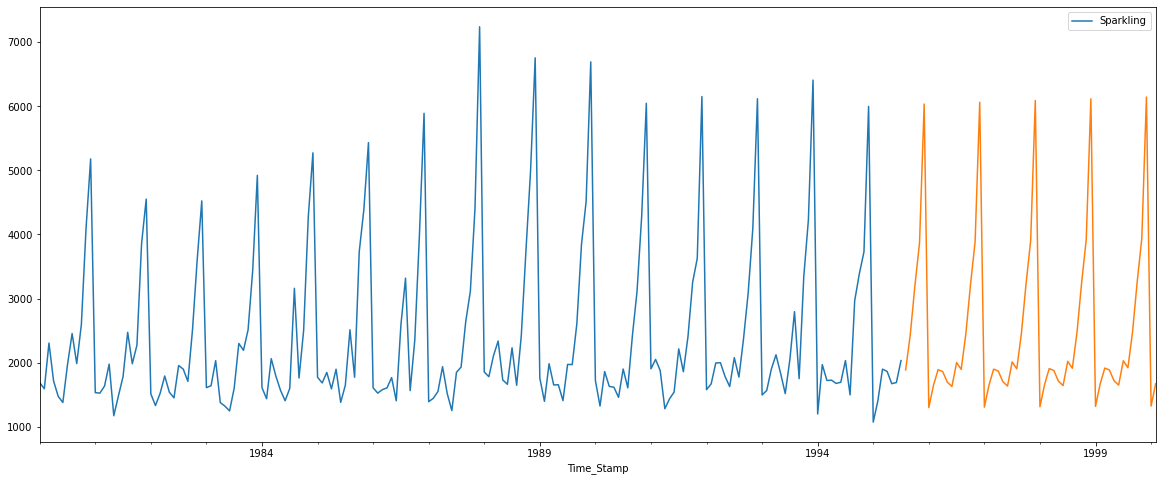

In [1112]:
df_sparkling.plot()
prediction_1.plot();

In [1113]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

lower_CI   prediction      upper_ci
1995-08-31   579.390754  1885.067293   7993.634860
1995-09-30  1128.918919  2434.595458   8543.163025
1995-10-31  1893.213261  3198.889800   9307.457368
1995-11-30  2562.756903  3868.433442   9977.001009
1995-12-31  4730.236509  6035.913048  12144.480615

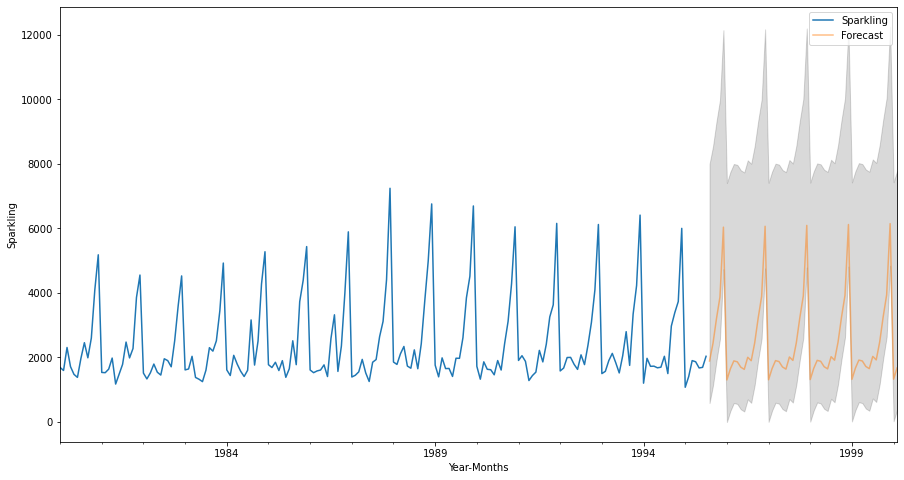

In [1114]:
# plot the forecast along with the confidence band

axis = df_sparkling.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

When we look at the predicted values with the respective confidence intervals, we see that even for a 95% confidence interval, the shaded area in the above graph (confidence interval) is quite high).

#### 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
#### Note: Stationarity should be checked at alpha = 0.05

#### Check for stationarity of the Training Data Time Series.

In [1115]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

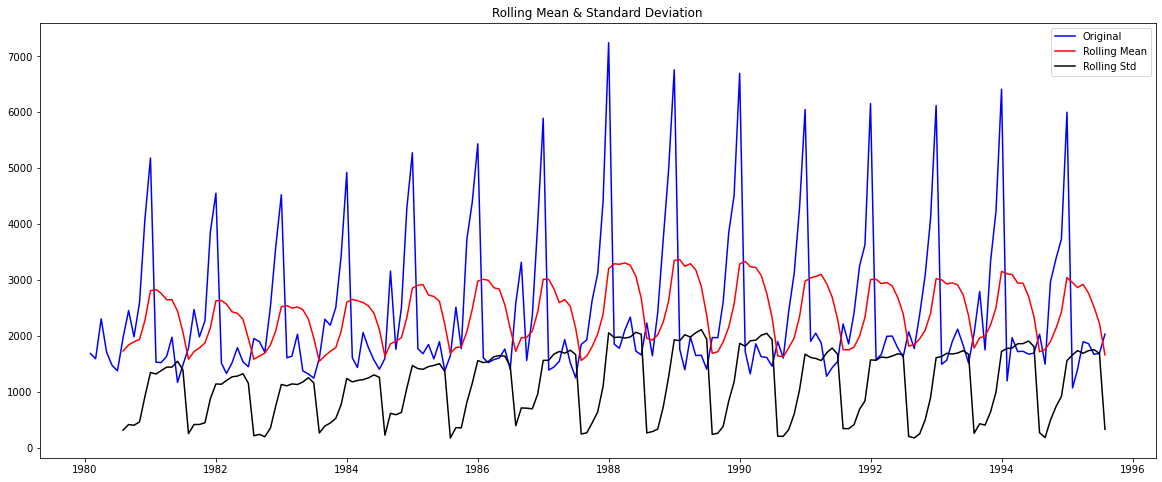

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1116]:
test_stationarity(df_sparkling['Sparkling'])

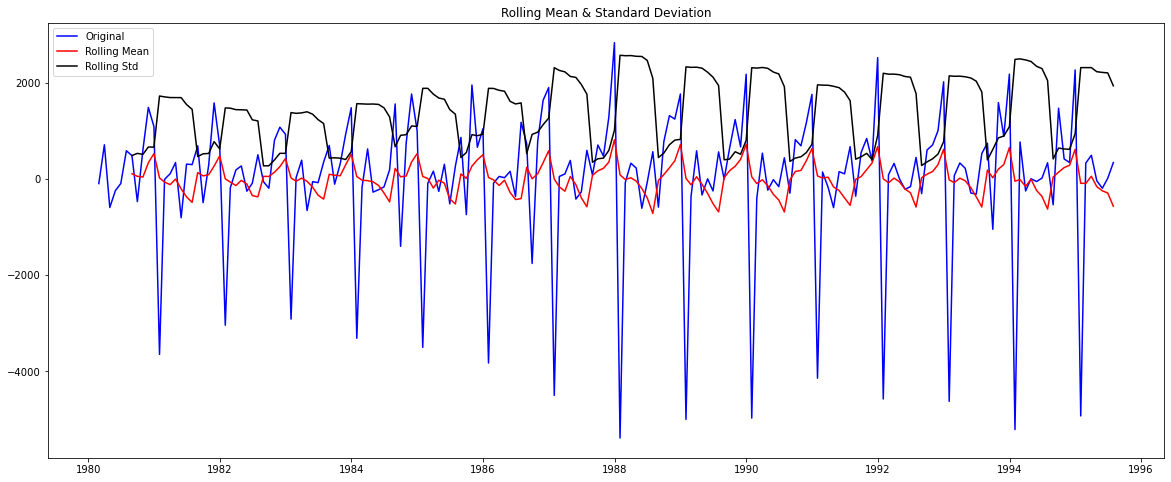

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1117]:
test_stationarity(df_sparkling['Sparkling'].diff().dropna())

#### 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Build an Automated version of a ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [1118]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [1119]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [1120]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064376843794
ARIMA(0, 1, 2) - AIC:2232.783097684644
ARIMA(1, 1, 0) - AIC:2268.5280607731743
ARIMA(1, 1, 1) - AIC:2235.0139453498614
ARIMA(1, 1, 2) - AIC:2233.5976471230297
ARIMA(2, 1, 0) - AIC:2262.035600271052
ARIMA(2, 1, 1) - AIC:2232.3604898831895
ARIMA(2, 1, 2) - AIC:2210.6178170236394


C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [1121]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.617817
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906438
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [1122]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.361
Date:                Sun, 13 Sep 2020   AIC                           2210.618
Time:                        16:13:11   BIC                           2227.869
Sample:                    02-29-1980   HQIC                          2217.628
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.517     10.810      0.000       4.573       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


#### Predict on the Test Set using this model and evaluate the model.

In [1123]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [1124]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.8038969457405


In [1125]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])
resultsDf

RMSE
ARIMA(2,1,2)  1374.803897

#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

#### Let us look at the ACF plot to understand the seasonal parameter for the SARIMA model.

In [1126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

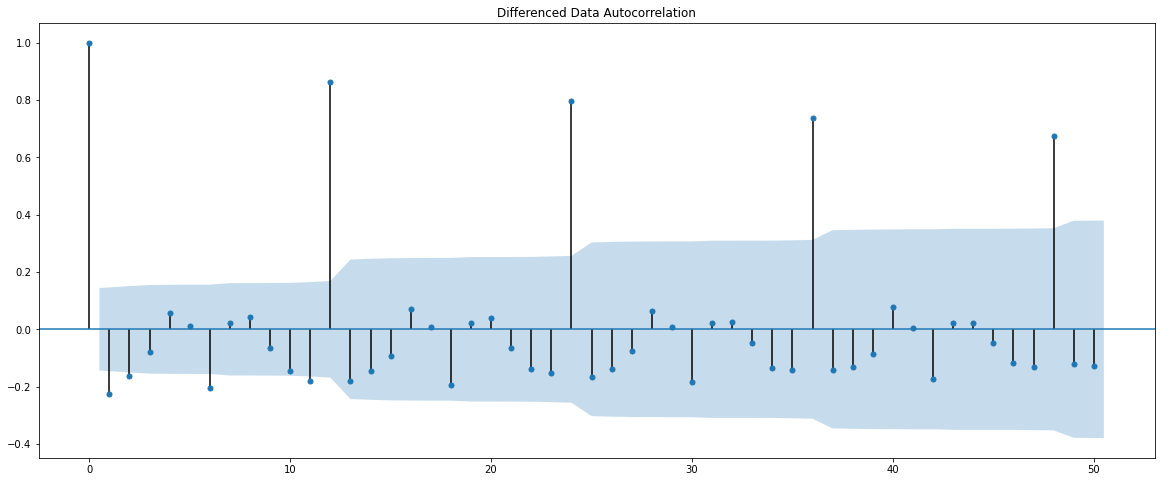

In [1127]:
plot_acf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [1128]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [1129]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1130]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1955.635553689026
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:2079.559984443299
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1926.936011107476
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1841.1993617510766


C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1810.9177805655816
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:2130.565285908283
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1918.1876339543646
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:2139.5732428785886


C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:2006.5174298136103
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1855.70932767538
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1798.7885104007626
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1800.7717933304364
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1741.703671025379
SARIMA(0, 1, 2)x(0, 0, 0, 6)7 - AIC:2187.441010168716
SARIMA(0, 1, 2)x(0, 0, 1, 6)7 - AIC:2087.6843840215815
SARIMA(0, 1, 2)x(0, 0, 2, 6)7 - AIC:1886.1151451697017
SARIMA(0, 1, 2)x(1, 0, 0, 6)7 - AIC:2129.7395689234913
SARIMA(0, 1, 2)x(1, 0, 1, 6)7 - AIC:1988.4111269091368
SARIMA(0, 1, 2)x(1, 0, 2, 6)7 - AIC:1839.693808585304
SARIMA(0, 1, 2)x(2, 0, 0, 6)7 - AIC:1791.653707905047
SARIMA(0, 1, 2)x(2, 0, 1, 6)7 - AIC:1793.6190984940338
SARIMA(0, 1, 2)x(2, 0, 2, 6)7 - AIC:1727.8888033761934
SARIMA(1, 1, 0)x(0, 0, 0, 6)7 - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 6)7 - AIC:2151.078268308344
SARIMA(1, 1, 0)x(0, 0, 2, 6)7 - AIC:1953.3652245476599
SARIMA(1, 1, 0)x(1, 0, 0, 6)7 - AIC:2146.1836648562185
SARIMA(1, 1, 0)x(

In [1131]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.678711
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888803
80  (2, 1, 2)  (2, 0, 2, 6)  1729.192578
17  (0, 1, 1)  (2, 0, 2, 6)  1741.703671
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379778

In [1132]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sun, 13 Sep 2020   AIC                           1727.679
Time:                                   16:13:51   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6450      0.286     -2.258      0.024      -1.205      -0.085
ma.L1         -0.1067      0.250     -0.427

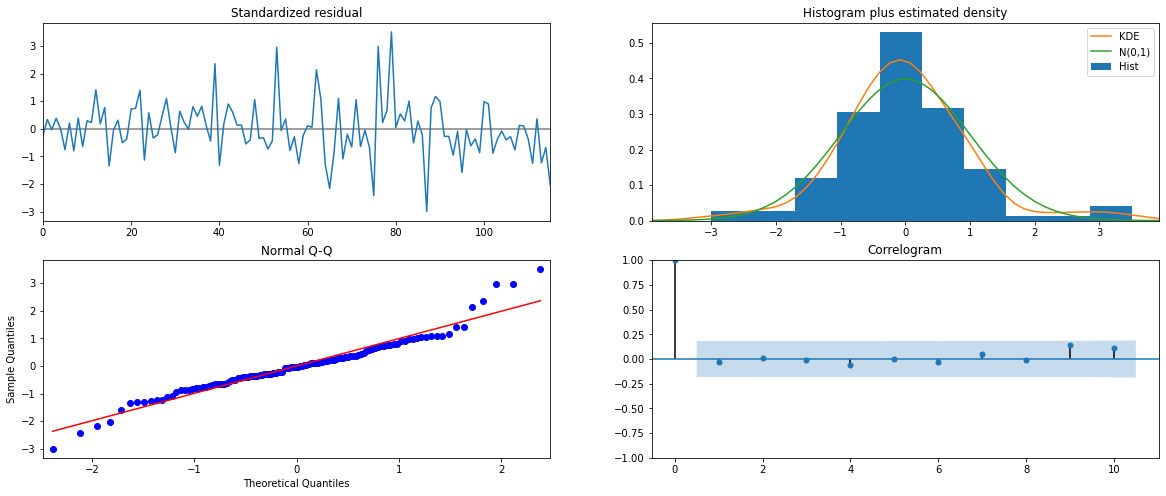

In [1133]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [1134]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [1135]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.241914  380.549102     584.379379    2076.104449
1  1176.889672  392.105312     408.377383    1945.401962
2  1625.981830  392.299342     857.089248    2394.874412
3  1546.312347  397.702558     766.829657    2325.795037
4  1308.404980  398.921789     526.532640    2090.277319

In [1136]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

627.24696187002


In [1137]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)            1374.803897
SARIMA(0,1,2)(2,0,2,6)   627.246962

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [1138]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [1139]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1140]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616845965
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640237637
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.990530138969
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791512
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158610574
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920813
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566674
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572733116
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881838598
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.0903193756485
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.150914408216
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954176473
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245088939071
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.368374041

In [1141]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.929654
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340405

In [1142]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 13 Sep 2020   AIC                           1555.584
Time:                                    16:14:55   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

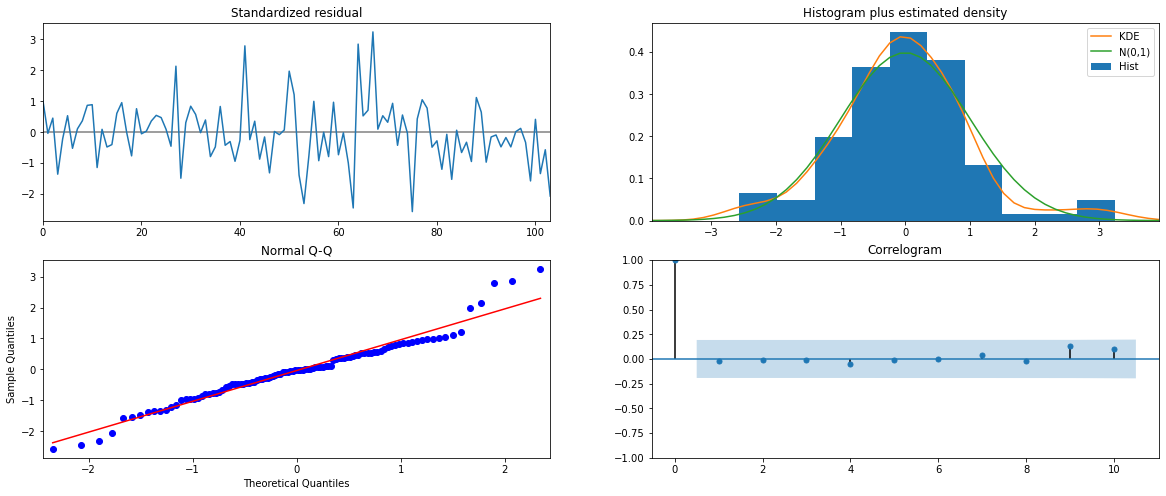

In [1143]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

## Predict on the Test Set using this model and evaluate the model.

In [1144]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [1145]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.357599  388.343082     566.219144    2088.496053
1  1315.084807  402.007140     527.165291    2103.004322
2  1621.551762  402.000753     833.644766    2409.458759
3  1598.840199  407.239586     800.665278    2397.015121
4  1392.657108  407.969857     593.050880    2192.263335

In [1146]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6418803855408


In [1147]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)             1374.803897
SARIMA(0,1,2)(2,0,2,6)    627.246962
SARIMA(1,1,2)(2,0,2,12)   528.641880

We see that the RMSE value has reduced further when the seasonality parameter was changed to 12.

#### 7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

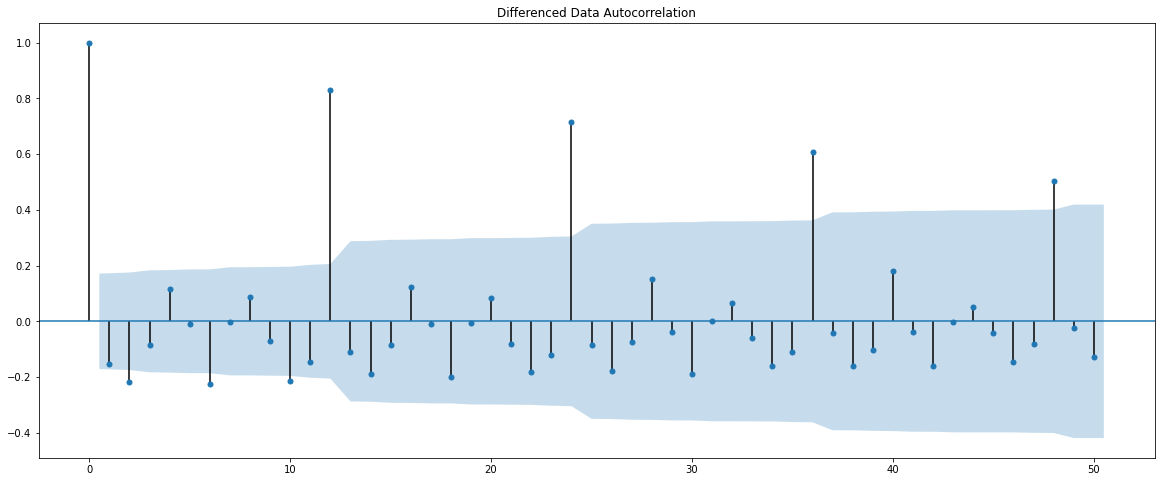

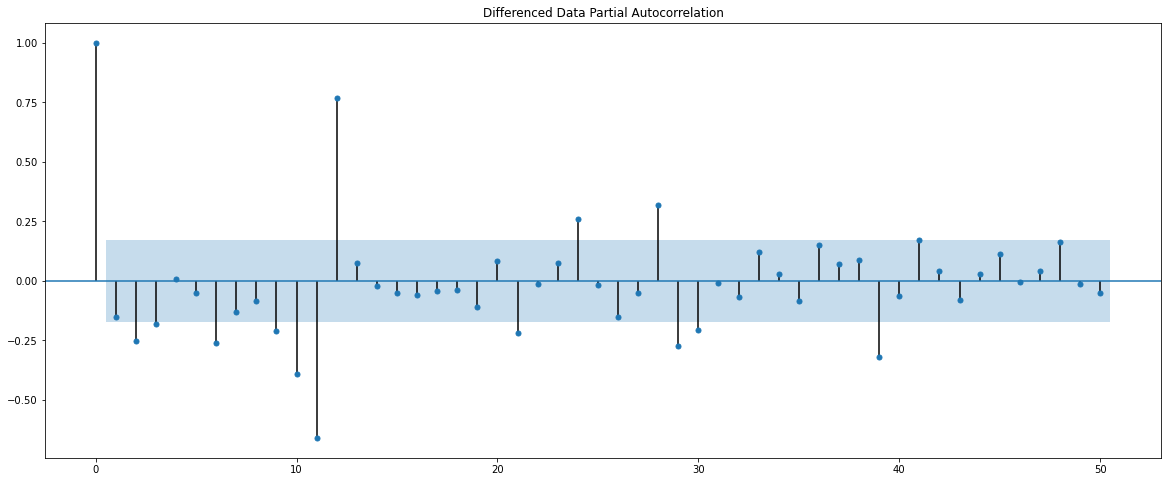

In [1148]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.
By looking at the above plots, we can say value of q = 2 and p = 2.

In [1149]:
from statsmodels.tsa.arima_model import ARIMA
manual_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.361
Date:                Sun, 13 Sep 2020   AIC                           2210.618
Time:                        16:14:57   BIC                           2227.869
Sample:                    02-29-1980   HQIC                          2217.628
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.517     10.810      0.000       4.573       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


#### Predict on the Test Set using this model and evaluate the model.

In [1150]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [1151]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1374.8038969457405


In [1152]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)             1374.803897
SARIMA(0,1,2)(2,0,2,6)    627.246962
SARIMA(1,1,2)(2,0,2,12)   528.641880
ARIMA(2,1,2)             1374.803897

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

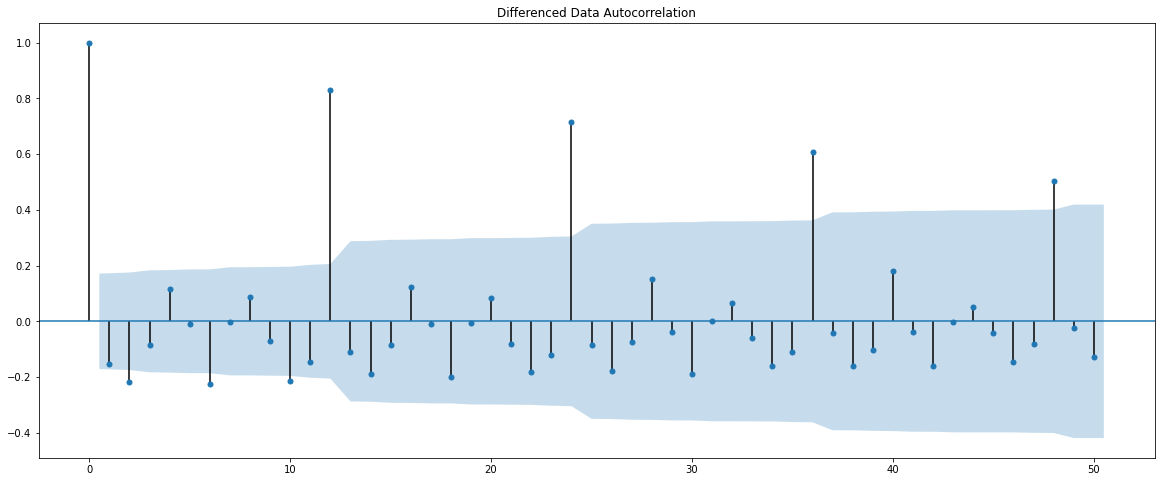

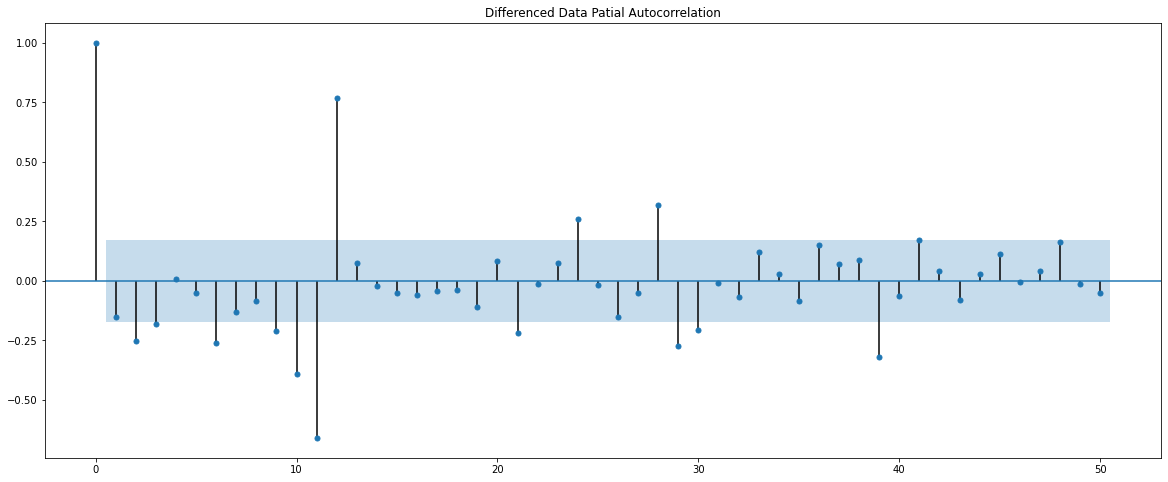

In [1153]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

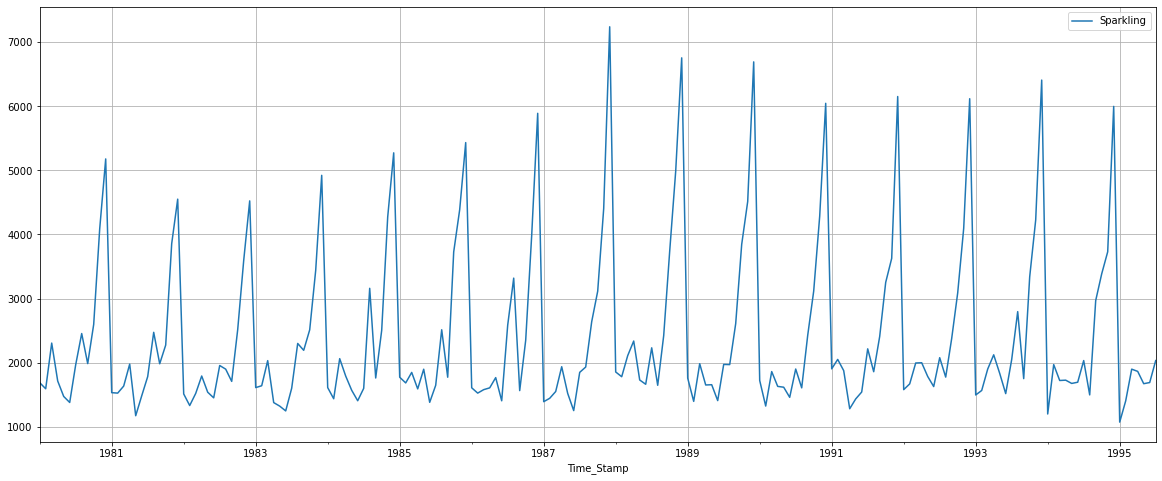

In [1154]:
df_sparkling.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

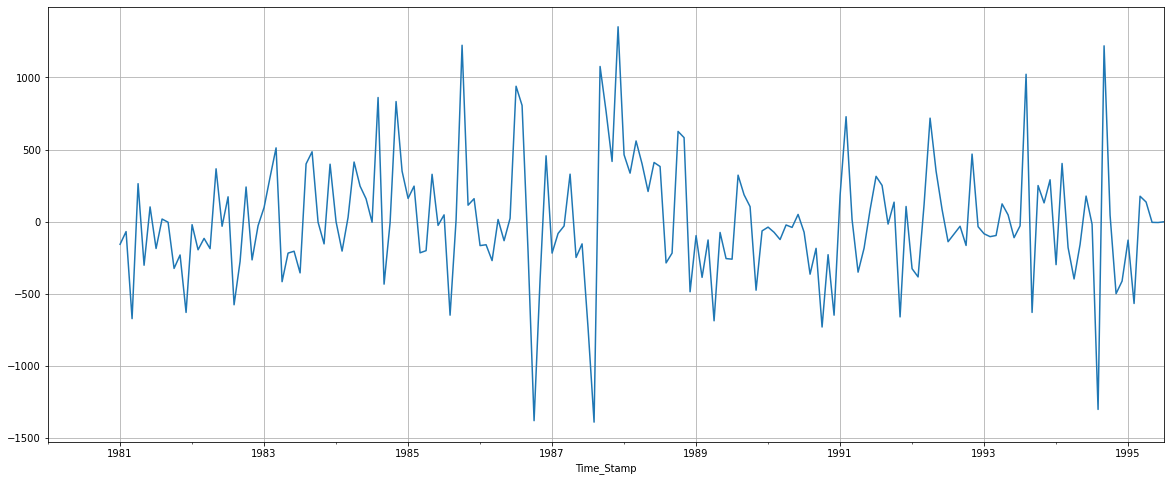

In [1155]:
(df_sparkling['Sparkling'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

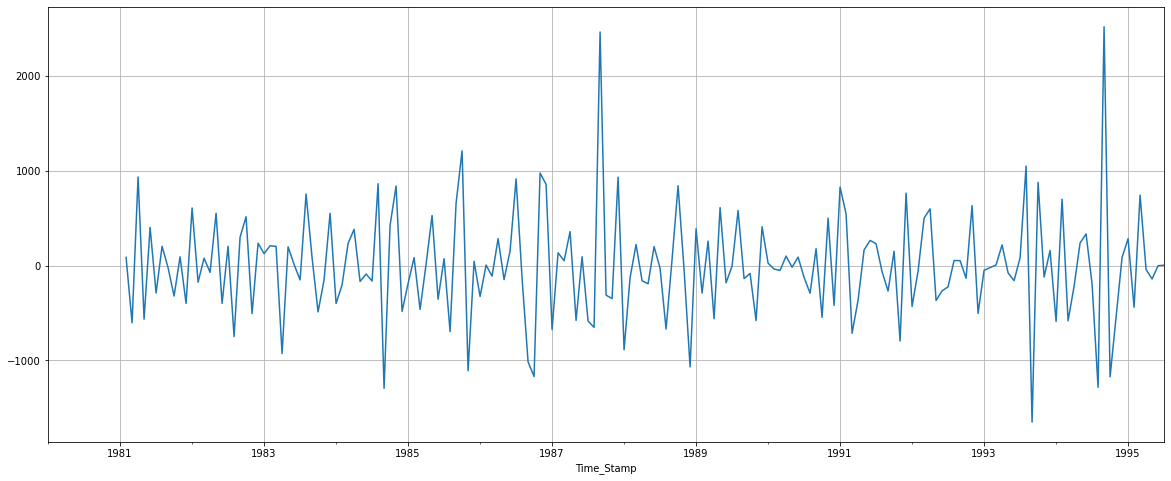

In [1156]:
(df_sparkling['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

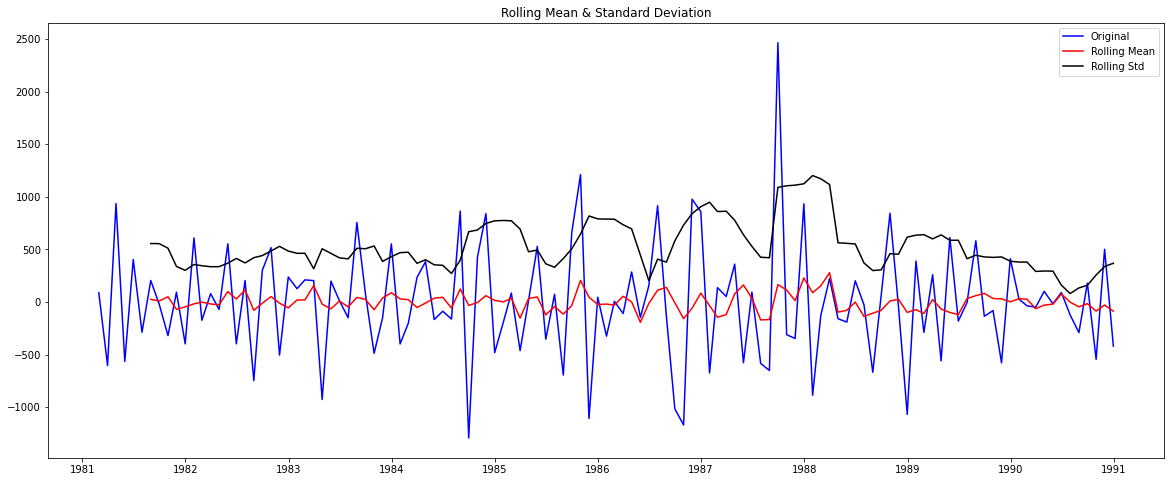

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [1157]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

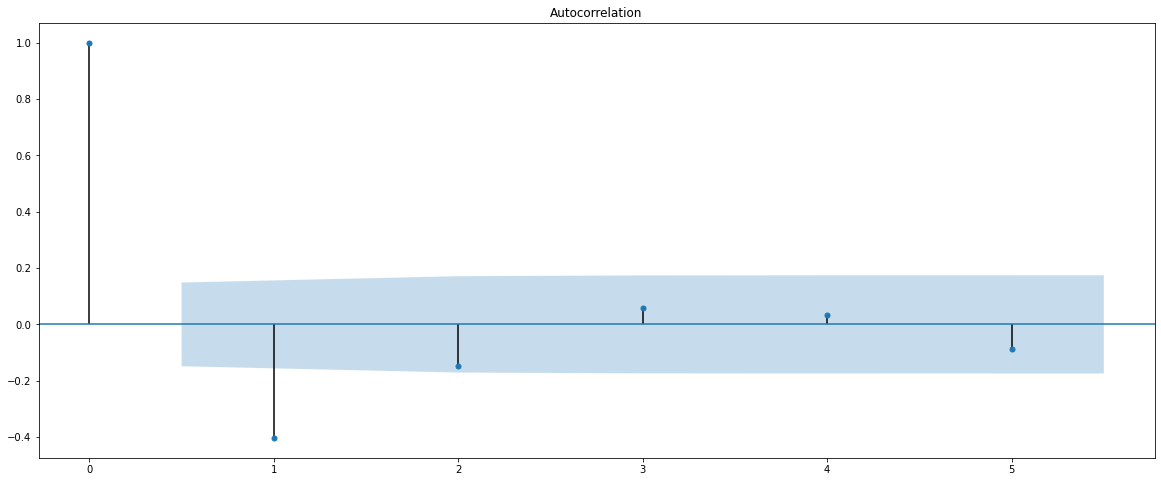

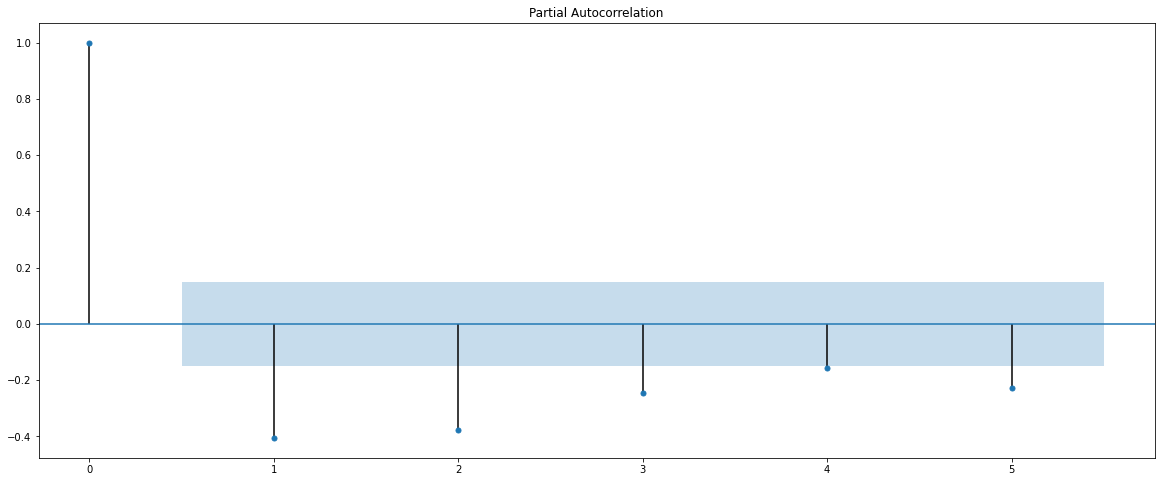

In [1158]:
plot_acf((df_sparkling['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=5)
plot_pacf((df_sparkling['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=5);

In [817]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -606.105
Date:                              Sun, 06 Sep 2020   AIC                           1230.209
Time:                                      18:09:58   BIC                           1251.759
Sample:                                           0   HQIC                          1238.856
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5701      0.339     -1.682      0.092      -1.234       0.094
ar.L2          0.03

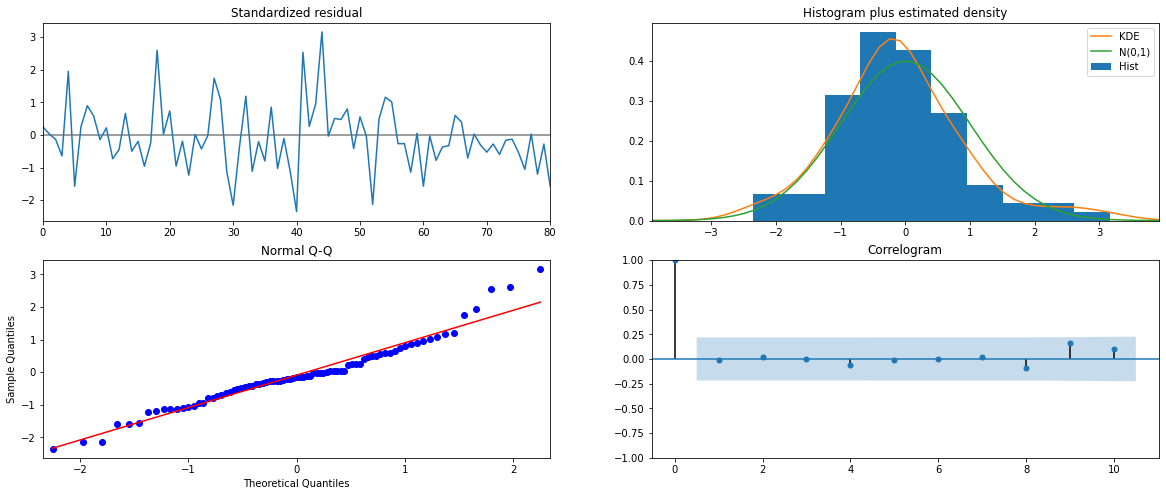

In [1159]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [1160]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [1161]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1488.216000  429.370602     646.665084    2329.766916
1  1439.292733  445.053937     567.003044    2311.582421
2  1788.428370  445.381410     915.496847    2661.359892
3  1739.956833  448.066120     861.763375    2618.150291
4  1561.594319  448.117734     683.299699    2439.888939

In [1162]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

337.3585851455623


#### 8.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [822]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(3, 1, 1, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)                1374.803897
SARIMA(0,1,2)(2,0,2,6)       627.246962
SARIMA(1,1,2)(2,0,2,12)      528.641880
ARIMA(2,1,2)                1374.803897
SARIMA(2,1,2)(3, 1, 1, 12)   337.358585

#### 9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Building the most optimum model on the Full Data.

In [823]:
full_data_model = sm.tsa.statespace.SARIMAX(df_sparkling['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(3, 1, [1], 12)   Log Likelihood               -1006.928
Date:                              Sun, 06 Sep 2020   AIC                           2031.855
Time:                                      18:40:37   BIC                           2058.069
Sample:                                  01-31-1980   HQIC                          2042.508
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7443      0.252     -2.950      0.003      -1.239      -0.250
ar.L2          0.01

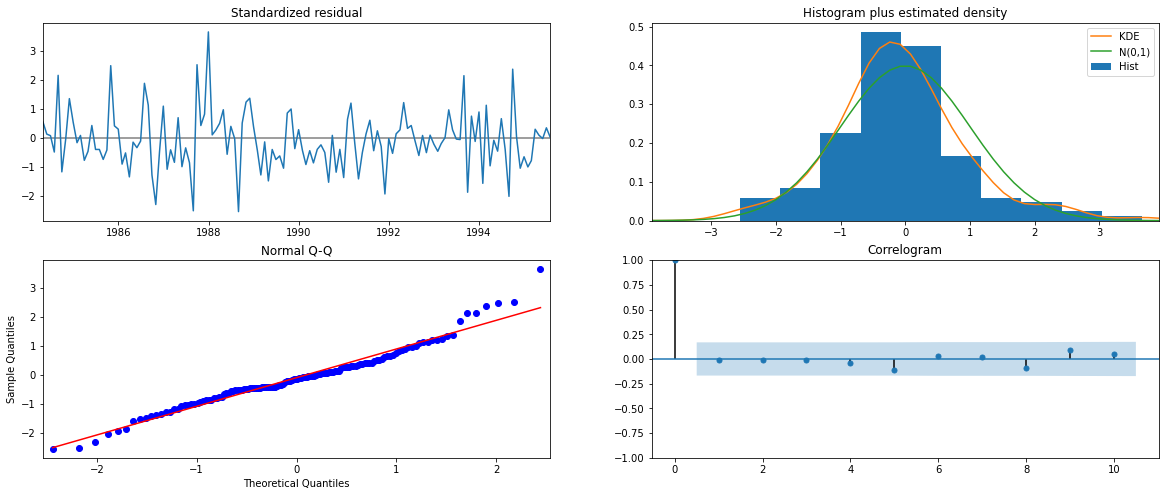

In [824]:
results_full_data_model.plot_diagnostics();

#### Evaluate the model on the whole and predict 12 months into the future.

In [826]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [831]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head(12)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1996.041296  379.481546    1252.271132    2739.811460
1995-09-30  2409.430399  384.127320    1656.554687    3162.306111
1995-10-31  3259.478223  384.130879    2506.595534    4012.360912
1995-11-30  4031.069584  386.067726    3274.390745    4787.748423
1995-12-31  6118.895689  386.113505    5362.127125    6875.664253
1996-01-31  1372.628557  387.032307     614.059175    2131.197940
1996-02-29  1584.424544  387.192306     825.541569    2343.307520
1996-03-31  1856.684618  387.825295    1096.561008    2616.808228
1996-04-30  1828.964084  388.128818    1068.245579    2589.682588
1996-05-31  1693.601267  388.759032     931.647566    2455.554968
1996-06-30  1578.361938  389.154818     815.632511    2341.091365
1996-07-31  2022.826279  389.744749    1258.940609    2786.711950

In [832]:
rmse = mean_squared_error(df_sparkling['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 581.8445326112865


In [833]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

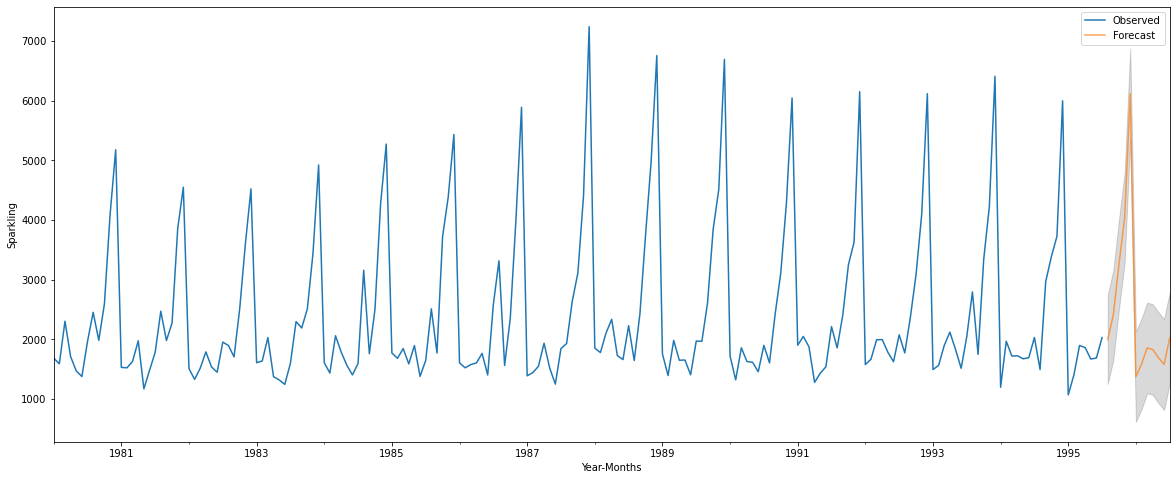

In [834]:
# plot the forecast along with the confidence band

axis = df_sparkling['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

#### 10.Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.